# Gaussian Mixture Models - UMAP Dataset

In [1]:
!pip install pyclustertend

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 25.0.1
[notice] To update, run: c:\program files\python38\python.exe -m pip install --upgrade pip


## Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import plotly.express as px
from sklearn.manifold import TSNE

## Load Dataset

In [3]:
umap_df = pd.read_csv('Data/umap_dataset.csv')
umap_df.columns

Index(['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5', 'UMAP6', 'UMAP7', 'UMAP8',
       'UMAP9', 'UMAP10', 'UMAP11', 'UMAP12', 'UMAP13', 'UMAP14', 'UMAP15',
       'UMAP16', 'UMAP17', 'UMAP18', 'UMAP19', 'UMAP20'],
      dtype='object')

In [4]:
umap_df.shape

(9442, 20)

## Metrics Calculation

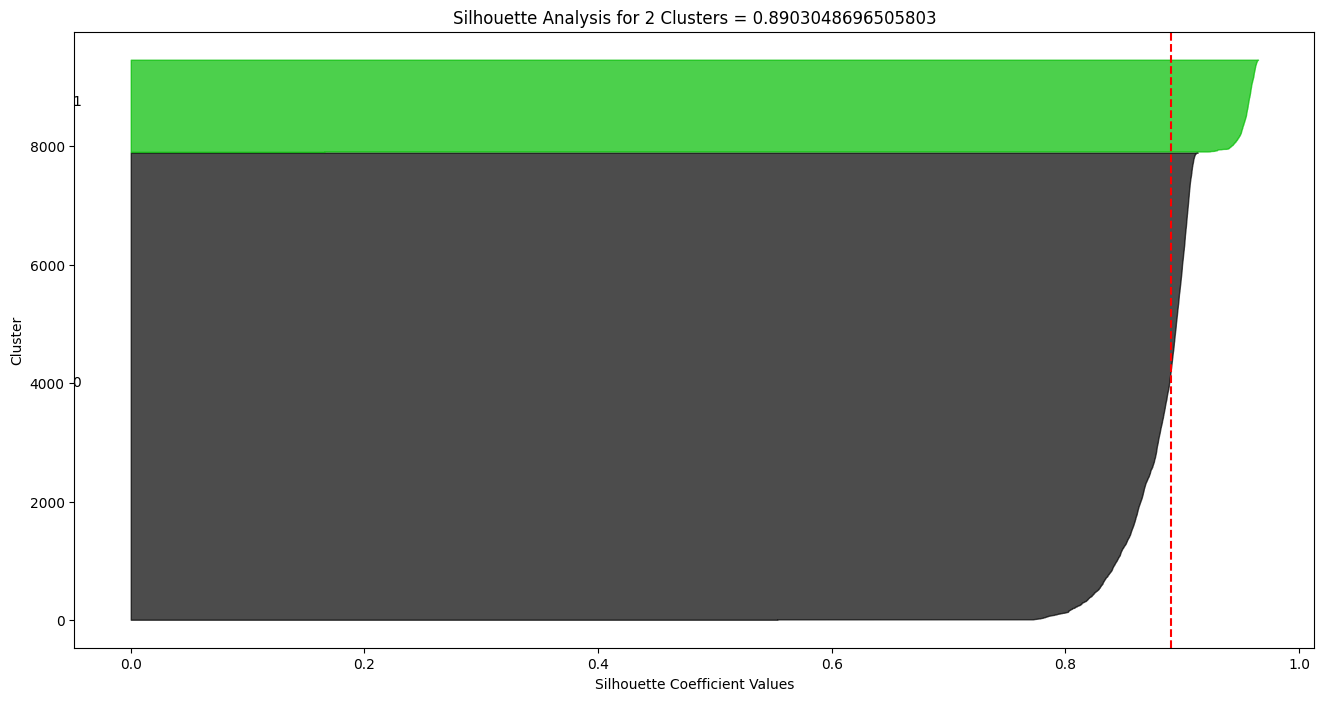

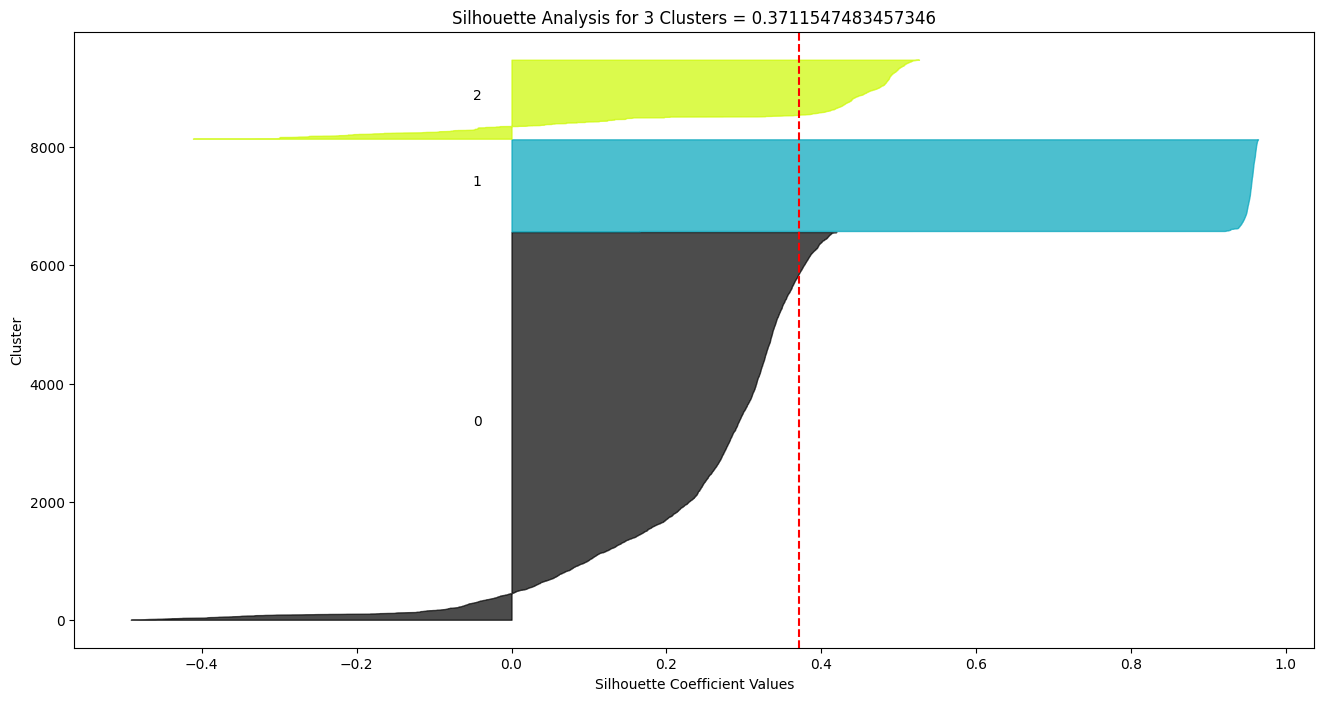

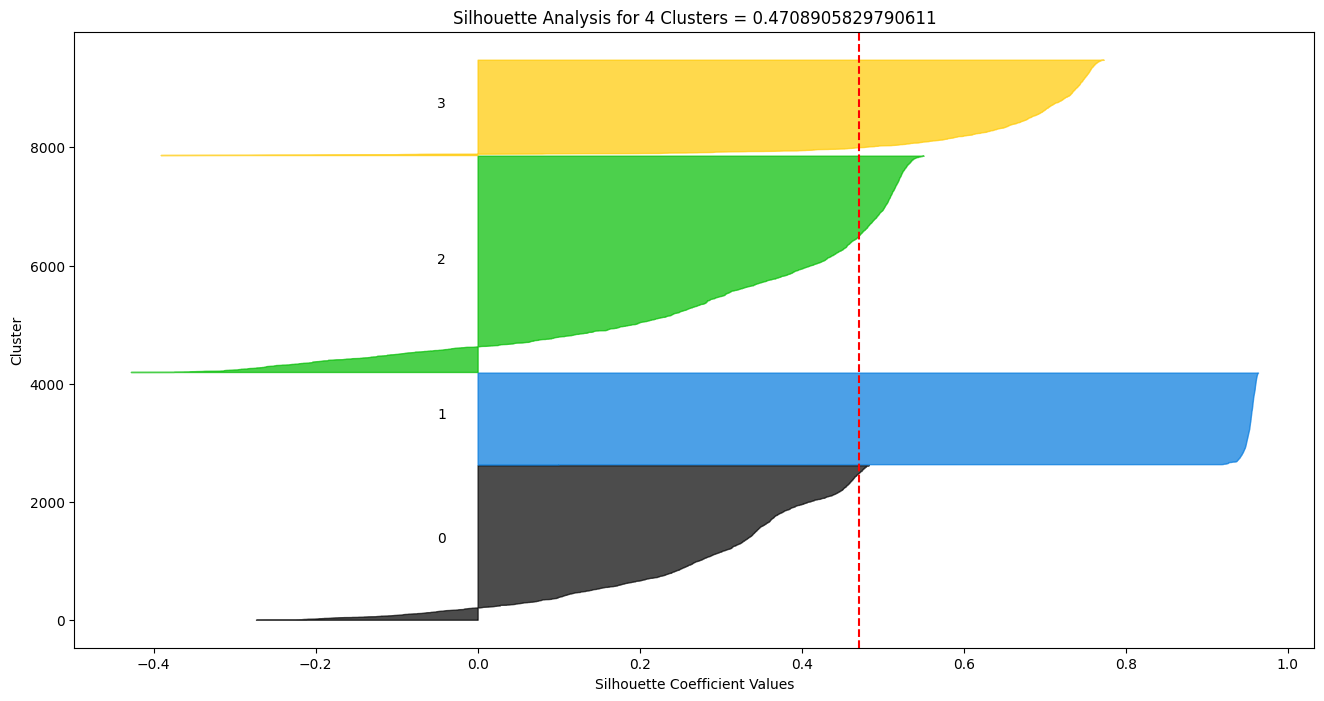

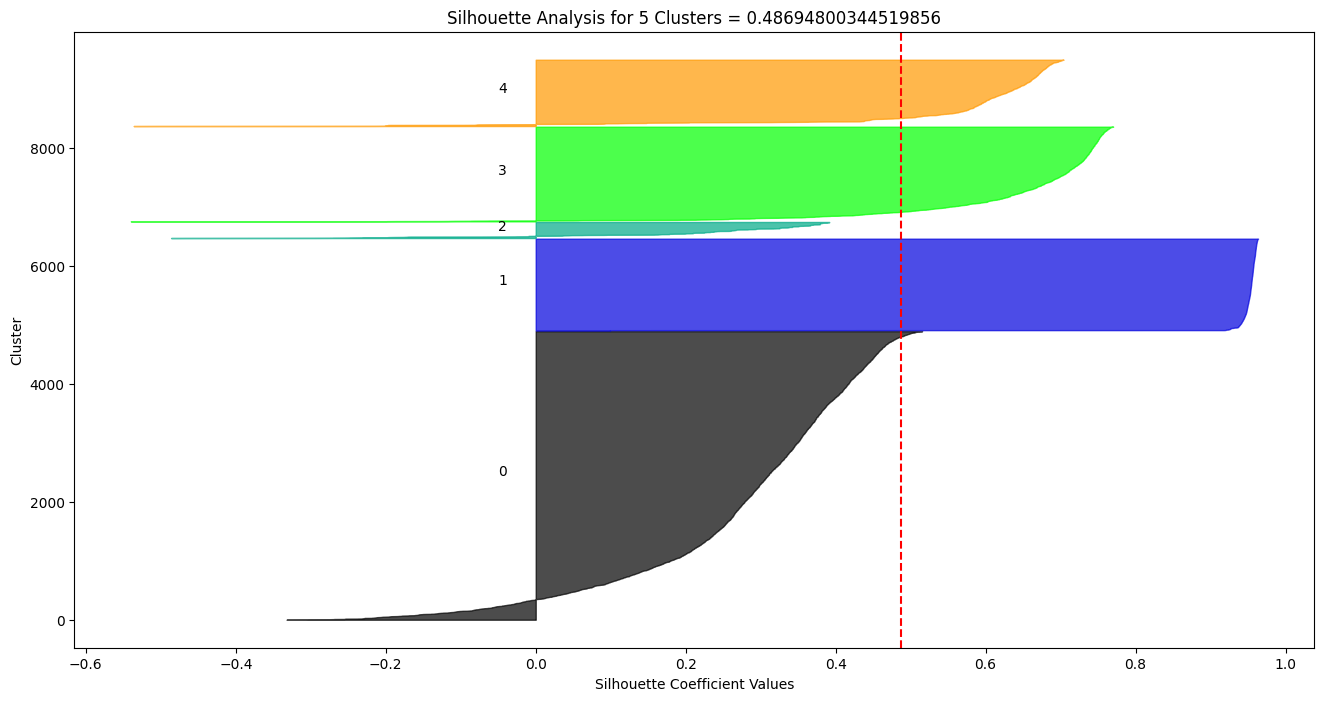

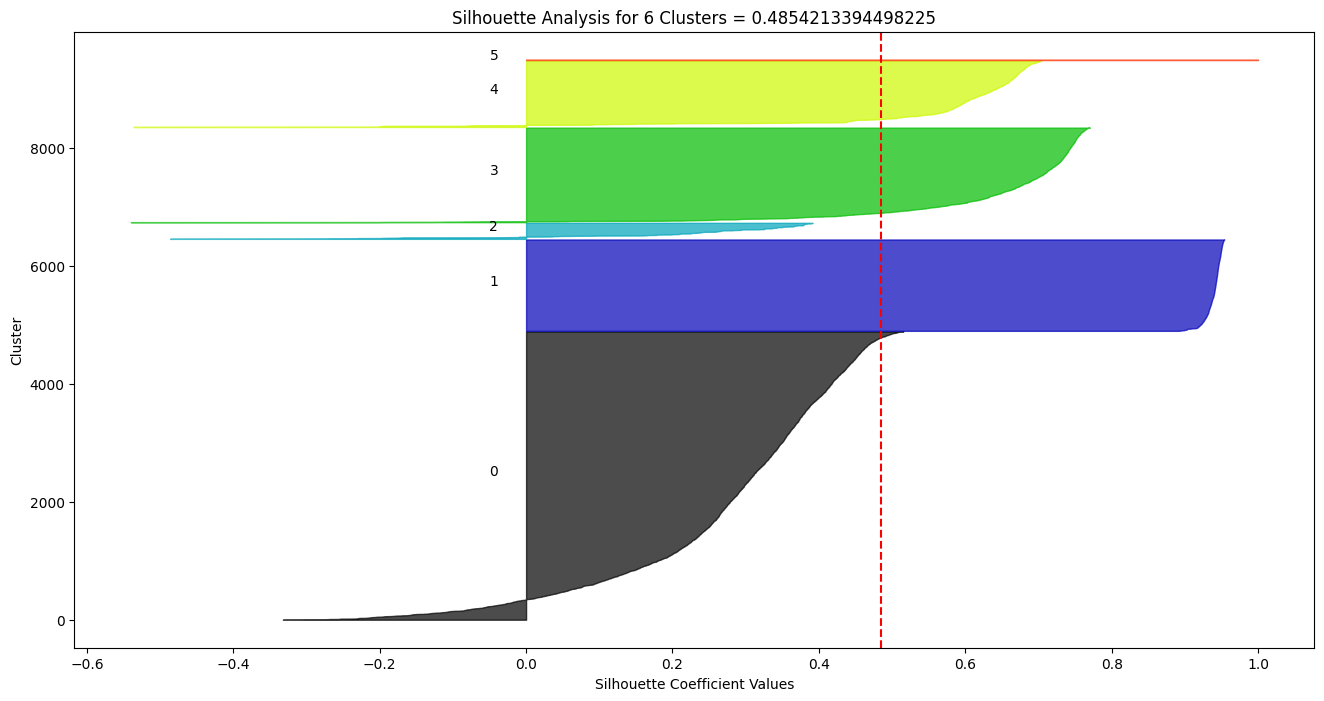

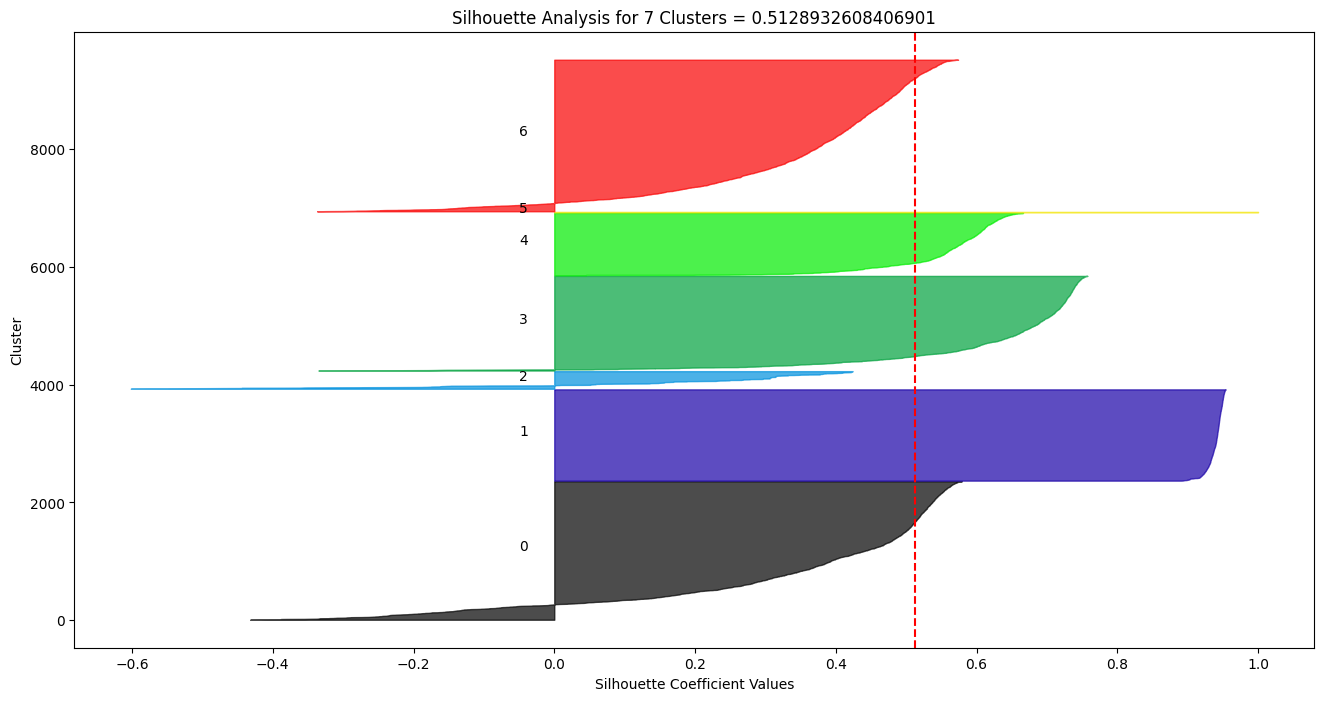

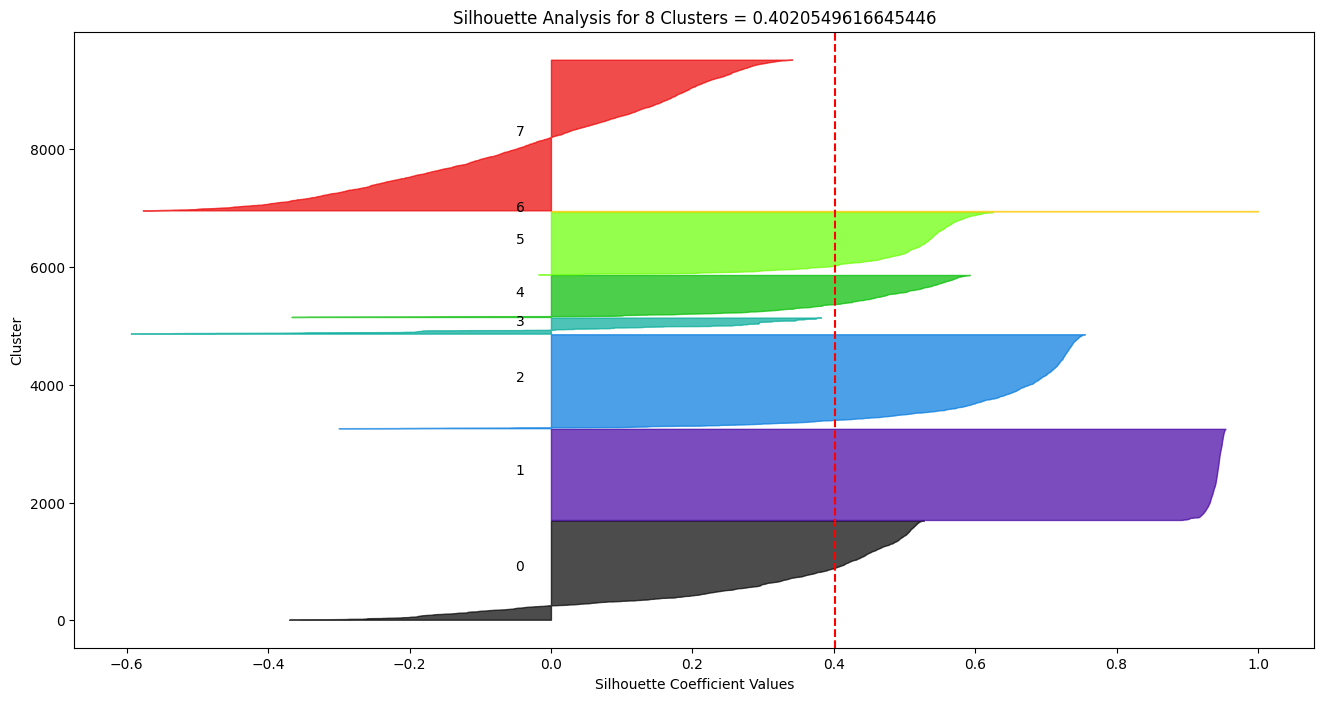

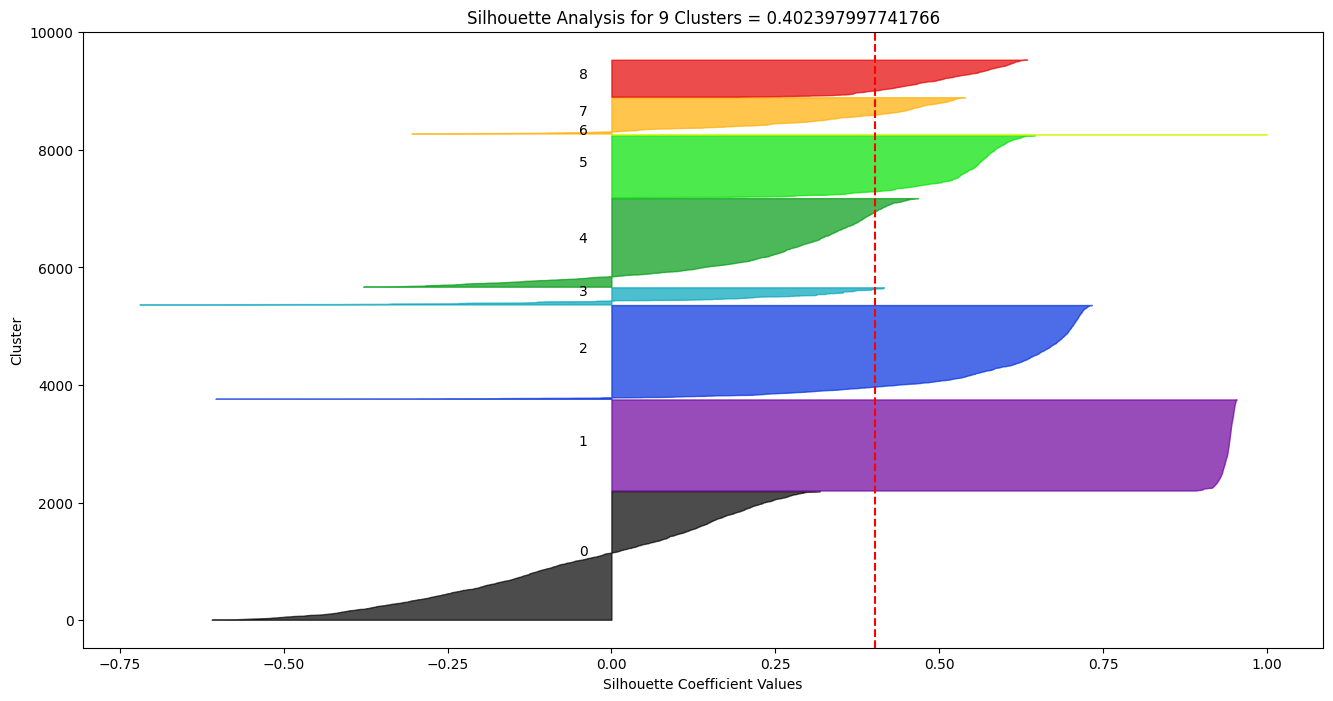

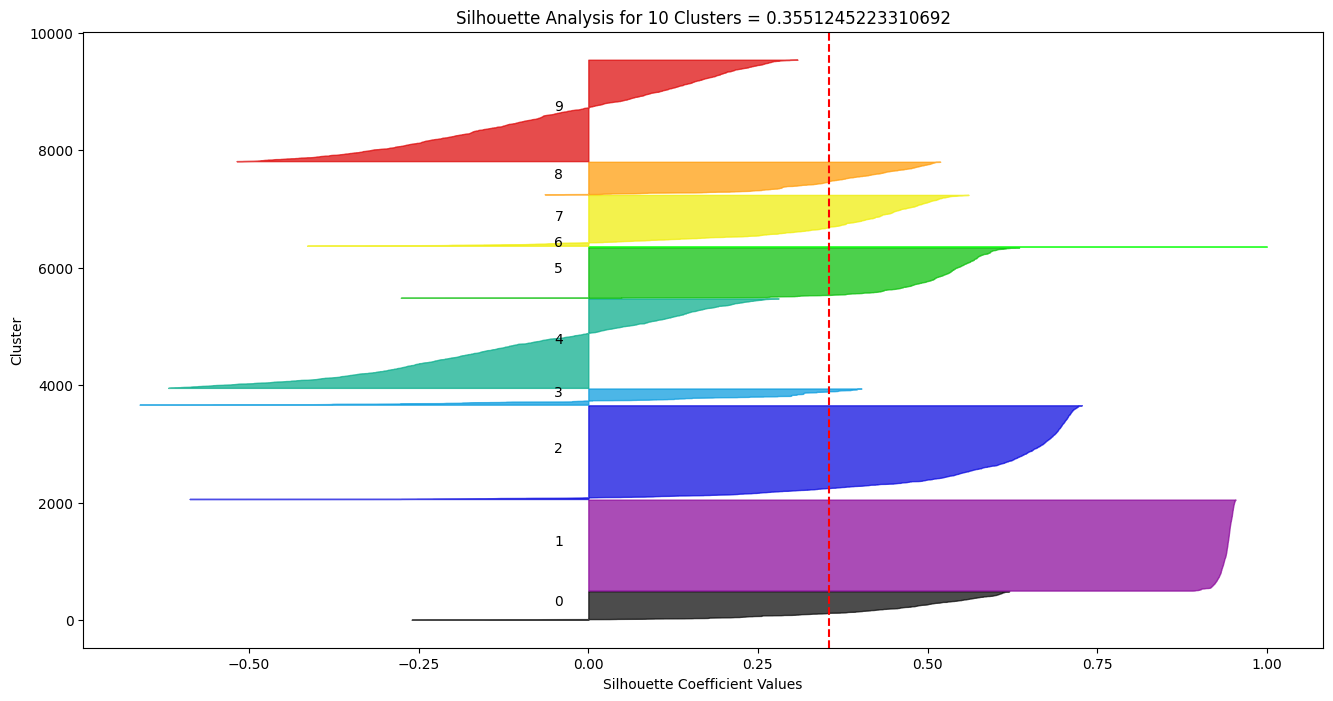

In [5]:
# Range of clusters to evaluate
range_clusters = range(2, 11)

# Initialize lists to store evaluation metrics
aic = []
bic = []
silhouette_scores = []
log_likelihood_values = []
CH_index = []
DB_values = []


silhouette_metrics = {
    "Number of Clusters": [],
    "Silhouette Score": [],
    "Log-likelihood":[],
    "CH indices":[],
    "Bic (find low)":[],
    "Davies Bouldin (find low)":[]
}

# Loop through each cluster count
for n_clusters in range_clusters:
    # GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_gmm = gmm.fit(umap_df)

    # 1. Calculate log-likelihood
    log_likelihood = cluster_gmm.score(umap_df) * len(umap_df)
    log_likelihood_values.append(log_likelihood)

    # 2. Calculate AIC/BIC
    aic.append(cluster_gmm.aic(umap_df))
    bic.append(cluster_gmm.bic(umap_df))

    # Assign clusters
    cluster_labels = cluster_gmm.predict(umap_df)
    #umap_df['Cluster'] = cluster_labels
    
    # 3. Calculate silhouette scores
    overall_silhouette_avg = silhouette_score(umap_df, cluster_labels)
    silhouette_scores.append(overall_silhouette_avg)
    
    # 4. Calculate CH index
    calinski_harabasz = calinski_harabasz_score(umap_df, cluster_labels)
    CH_index.append(calinski_harabasz)

    # 5. Calculate DB 
    davies_bouldin = davies_bouldin_score(umap_df, cluster_labels)
    DB_values.append(davies_bouldin)

    silhouette_metrics["Number of Clusters"].append(n_clusters)
    silhouette_metrics["Silhouette Score"].append(overall_silhouette_avg)
    silhouette_metrics["Log-likelihood"].append(log_likelihood)
    silhouette_metrics["CH indices"].append(calinski_harabasz)
    silhouette_metrics["Bic (find low)"].append(cluster_gmm.bic(umap_df))
    silhouette_metrics["Davies Bouldin (find low)"].append(davies_bouldin)


    # Visualize silhouette plot
    silhouette_per_sample = silhouette_samples(umap_df, cluster_labels)

    plt.figure(figsize=(16, 8))
    y_lower = 10
    for i in range(n_clusters):
        
        cluster_values = silhouette_per_sample[np.array(cluster_labels) == i]
        cluster_values.sort()

        size_cluster = cluster_values.shape[0]
        y_upper = y_lower + size_cluster
        color = plt.cm.nipy_spectral(float(i) / n_clusters)

        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=overall_silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Analysis for {n_clusters} Clusters = {overall_silhouette_avg}")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster")
    plt.show()


metrics_df_umap = pd.DataFrame(silhouette_metrics)

In [6]:
metrics_df_umap

Number of Clusters  Silhouette Score  Log-likelihood     CH indices  \
0                   2          0.890305   469164.380869  160014.351972   
1                   3          0.371155   556062.532696   94087.008273   
2                   4          0.470891   547499.057829  127833.620063   
3                   5          0.486948   602210.474965  102999.401533   
4                   6          0.485421   611382.270027   93048.478827   
5                   7          0.512893   618070.071274  115290.494319   
6                   8          0.402055   624173.632237   97393.536452   
7                   9          0.402398   630478.510208   98966.768422   
8                  10          0.355125   633931.540582   83238.140090   

   Bic (find low)  Davies Bouldin (find low)  
0   -9.341093e+05                   0.122823  
1   -1.105791e+06                   1.091335  
2   -1.086550e+06                   0.824928  
3   -1.193858e+06                   0.871882  
4   -1.210088e+06                   0.738760  
5   -1.221349e+06                   0.722614  
6   -1.231442e+06                   0.861508  
7   -1.241937e+06                   0.887979  
8   -1.246729e+06                   1.103488

## 3D Visualization


Processing for 2 clusters...

Processing for 3 clusters...

Processing for 4 clusters...

Processing for 5 clusters...

Processing for 6 clusters...

Processing for 7 clusters...

Processing for 8 clusters...

Processing for 9 clusters...

Processing for 10 clusters...


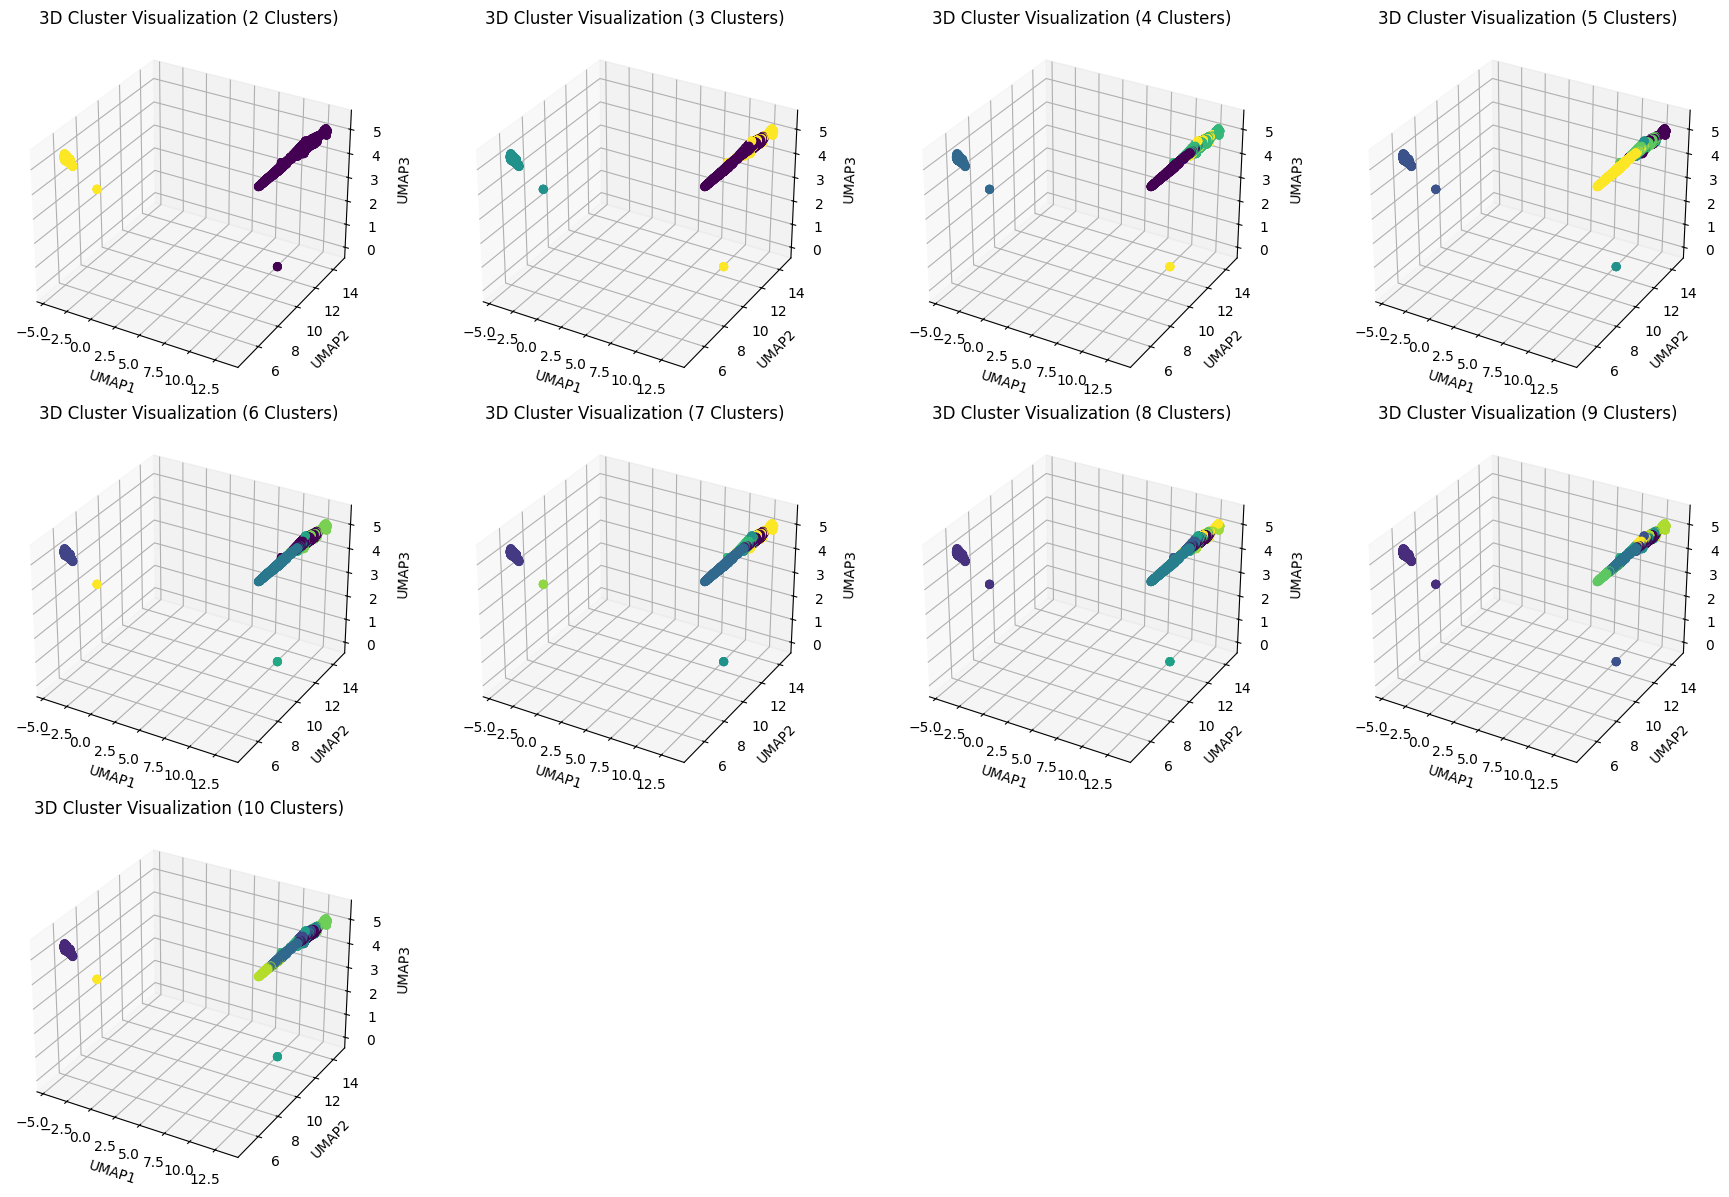

In [7]:
# Define range for clusters (2 to 5)
cluster_range = range(2, 11)

fig = plt.figure(figsize=(18, 12))

for idx, n_clusters in enumerate(cluster_range):
    print(f"\nProcessing for {n_clusters} clusters...")

    # Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    umap_df['Cluster'] = gmm.fit_predict(umap_df)

    # Create 3D subplot
    ax = fig.add_subplot(3, 4, idx + 1, projection='3d')

    # Scatter plot using first 3 PCA components
    scatter = ax.scatter(
        umap_df['UMAP1'], umap_df['UMAP2'], umap_df['UMAP3'],
        c=umap_df['Cluster'], cmap='viridis', s=30, alpha=0.7
    )

    ax.set_title(f'3D Cluster Visualization ({n_clusters} Clusters)')
    ax.set_xlabel('UMAP1')
    ax.set_ylabel('UMAP2')
    ax.set_zlabel('UMAP3')

plt.tight_layout()
plt.show()

## TSNE Visualization

Running GMM + t-SNE for 2 clusters...
Running GMM + t-SNE for 3 clusters...
Running GMM + t-SNE for 4 clusters...
Running GMM + t-SNE for 5 clusters...
Running GMM + t-SNE for 6 clusters...
Running GMM + t-SNE for 7 clusters...
Running GMM + t-SNE for 8 clusters...
Running GMM + t-SNE for 9 clusters...
Running GMM + t-SNE for 10 clusters...


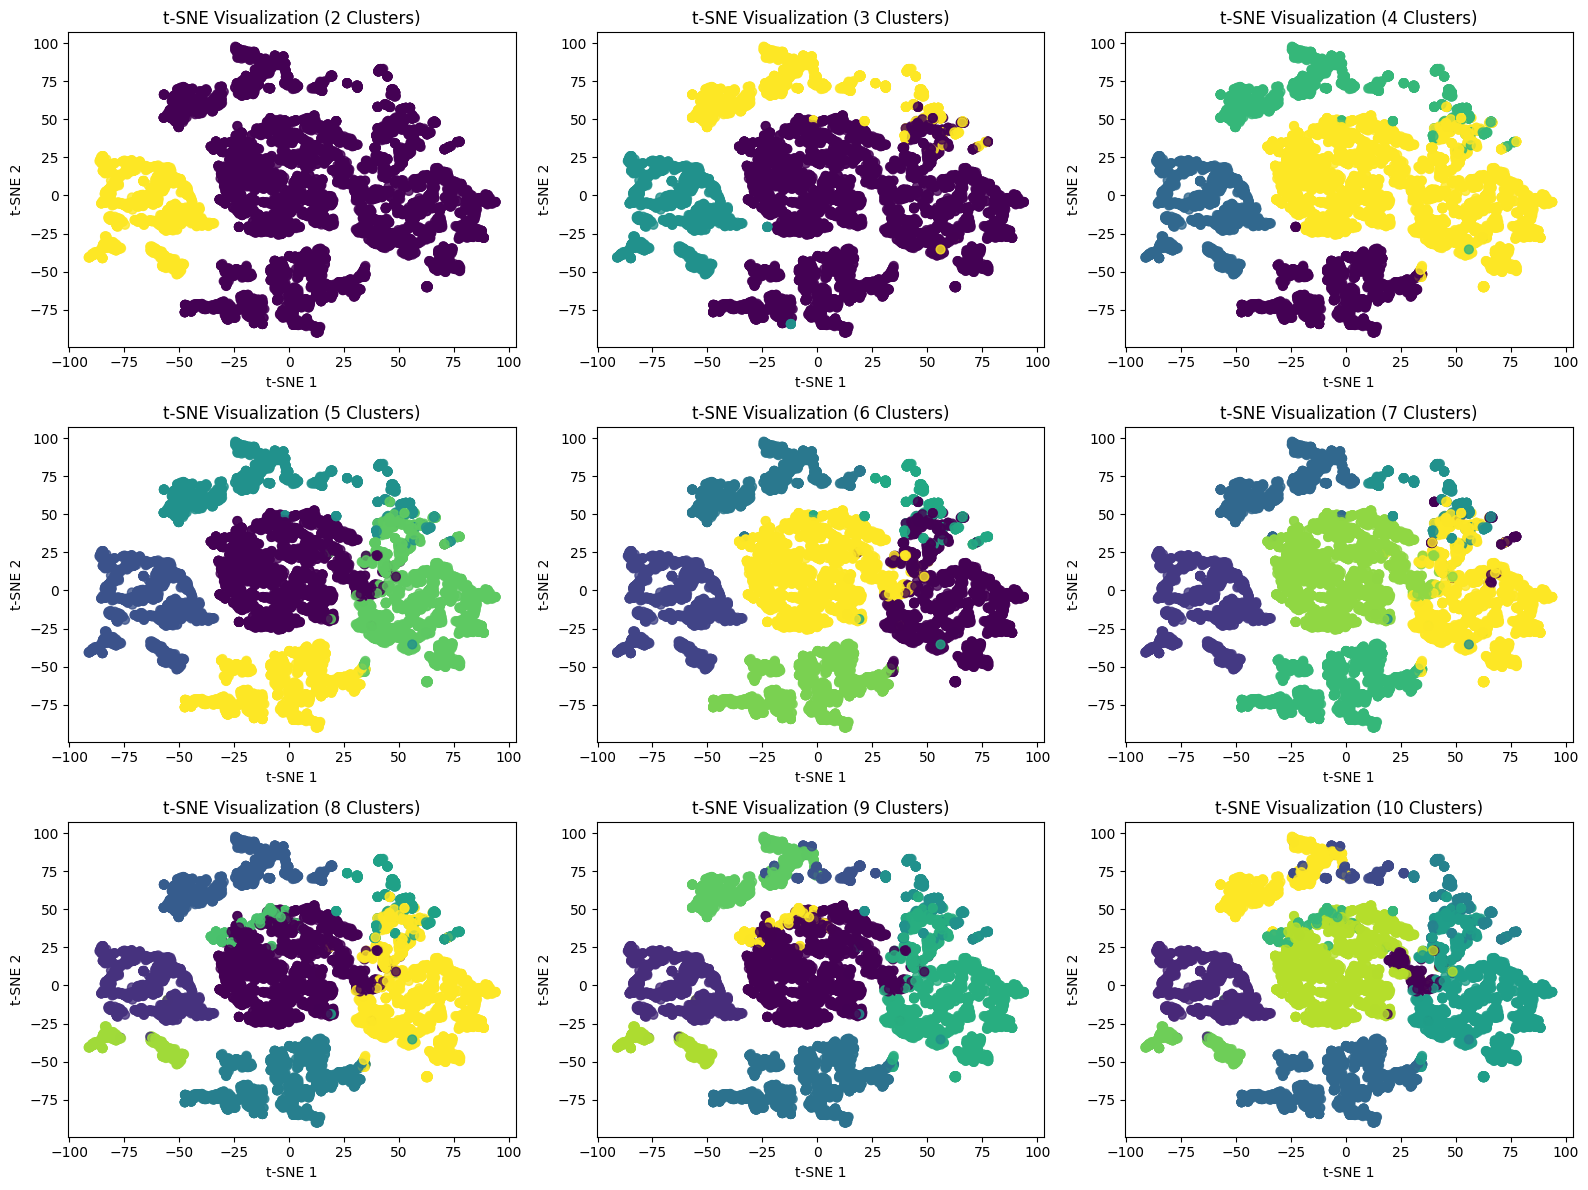

In [8]:
# Define range for clusters (2 to 5)
cluster_range = range(2, 11)

# Create figure for all subplots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()


for idx, n_clusters in enumerate(cluster_range):
    print(f"Running GMM + t-SNE for {n_clusters} clusters...")

    # Step 1: Fit GMM
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    umap_df['Cluster'] = gmm.fit_predict(umap_df)

    # Step 2: Run t-SNE (2D projection)
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
    tsne_result = tsne.fit_transform(umap_df[[f'UMAP{i}' for i in range(1, 21)]])

    # Step 3: Add TSNE coordinates
    umap_df['TSNE1'] = tsne_result[:, 0]
    umap_df['TSNE2'] = tsne_result[:, 1]

    # Step 4: Plot t-SNE scatter
    ax = axes[idx]
    scatter = ax.scatter(
        umap_df['TSNE1'], umap_df['TSNE2'],
        c=umap_df['Cluster'], cmap='viridis', s=40, alpha=0.8
    )
    ax.set_title(f"t-SNE Visualization ({n_clusters} Clusters)")
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")

plt.tight_layout()
plt.show()


## Summary

In [9]:
# ==========================================
# 📊 FINAL GMM CLUSTER SUMMARY & VISUALIZATION
# ==========================================

# --- Pick the best number of clusters based on metrics ---
best_n = 3   # Replace with the optimal number determined from previous analysis

# Fit final GMM model
final_gmm = GaussianMixture(n_components=best_n, random_state=42)
umap_df['Final_Cluster'] = final_gmm.fit_predict(umap_df)

print(f"✅ Final model fitted with {best_n} clusters.\n")

# --- 2️Cluster Size Summary ---
cluster_counts = umap_df['Final_Cluster'].value_counts().sort_index()
print("Cluster Size Distribution:")
print(cluster_counts)
print("\n")




✅ Final model fitted with 3 clusters.

Cluster Size Distribution:
Final_Cluster
0    6505
1    1571
2    1366
Name: count, dtype: int64




## Subclustering

Subset size for subclustering: 6505 rows

📈 Subcluster Model Metrics (Cluster 0):
   n_clusters           BIC           AIC  LogLikelihood
0           2 -11072.212011 -11201.038212       0.863877
1           3 -12324.705765 -12521.335230       0.966897
2           4 -13812.012842 -14076.445571       1.087967
3           5 -14479.577845 -14811.813838       1.146027
4           6 -14538.765578 -14938.804835       1.157326

✅ Optimal number of subclusters inside Cluster 0: 6


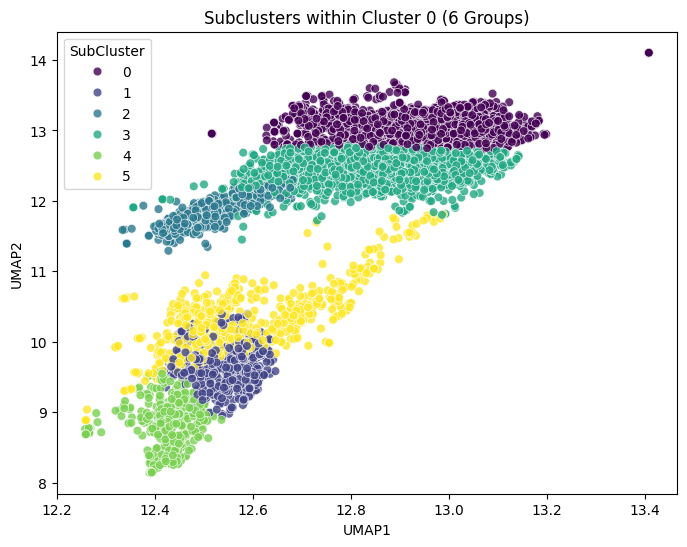

In [10]:
# Extract the dominant cluster
large_cluster = umap_df[umap_df['Final_Cluster'] == 0].copy()
print(f"Subset size for subclustering: {large_cluster.shape[0]} rows")

# Try a range of subclusters (2–6)
subcluster_range = range(2, 7)
sub_results = []

for n in subcluster_range:
    gmm_sub = GaussianMixture(n_components=n, random_state=42)
    gmm_sub.fit(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])
    
    # Record key metrics
    sub_results.append({
        'n_clusters': n,
        'BIC': gmm_sub.bic(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']]),
        'AIC': gmm_sub.aic(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']]),
        'LogLikelihood': gmm_sub.score(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])
    })

# Convert to DataFrame to inspect
sub_metrics = pd.DataFrame(sub_results)
print("\n📈 Subcluster Model Metrics (Cluster 0):")
print(sub_metrics)

# Pick best number based on lowest BIC
best_sub_n = sub_metrics.loc[sub_metrics['BIC'].idxmin(), 'n_clusters']
print(f"\n✅ Optimal number of subclusters inside Cluster 0: {best_sub_n}")

# Fit final subcluster model
final_sub_gmm = GaussianMixture(n_components=int(best_sub_n), random_state=42)
large_cluster['SubCluster'] = final_sub_gmm.fit_predict(large_cluster[['UMAP1', 'UMAP2', 'UMAP3']])

# Visualization of subclusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=large_cluster,
    x='UMAP1', y='UMAP2',
    hue='SubCluster',
    palette='viridis', s=40, alpha=0.8
)
plt.title(f"Subclusters within Cluster 0 ({best_sub_n} Groups)")
plt.show()


### Compare the Silhouette, CH and DB Index here

In [11]:
# Extract Cluster 0 for sub-clustering
large_cluster = umap_df[umap_df['Cluster'] == 0].copy()
print(f"Subset size for subclustering: {large_cluster.shape[0]} rows")

# Range of subclusters to evaluate
subcluster_range = range(2, 7)

# Initialize storage for metrics
sub_metrics = {
    "Number of SubClusters": [],
    "Silhouette Score": [],
    "Log-likelihood": [],
    "CH indices": [],
    "BIC (find low)": [],
    "Davies Bouldin (find low)": []
}

# Get the UMAP features for Cluster 0
X_sub = large_cluster[['UMAP1', 'UMAP2', 'UMAP3']].values

# Loop through each subcluster count
for n_subclusters in subcluster_range:
    print(f"\n📊 Evaluating k={n_subclusters} subclusters...")
    
    # Fit GMM
    gmm_sub = GaussianMixture(n_components=n_subclusters, random_state=42)
    gmm_sub.fit(X_sub)
    
    # Get cluster assignments
    subcluster_labels = gmm_sub.predict(X_sub)
    
    # Calculate metrics
    silhouette = silhouette_score(X_sub, subcluster_labels)
    db_index = davies_bouldin_score(X_sub, subcluster_labels)
    ch_score = calinski_harabasz_score(X_sub, subcluster_labels)
    bic = gmm_sub.bic(X_sub)
    aic = gmm_sub.aic(X_sub)
    log_likelihood = gmm_sub.score(X_sub) * len(X_sub)
    
    # Store results
    sub_metrics["Number of SubClusters"].append(n_subclusters)
    sub_metrics["Silhouette Score"].append(silhouette)
    sub_metrics["Davies Bouldin (find low)"].append(db_index)
    sub_metrics["CH indices"].append(ch_score)
    sub_metrics["BIC (find low)"].append(bic)
    sub_metrics["Log-likelihood"].append(log_likelihood)
    
    print(f"  Silhouette: {silhouette:.4f}")
    print(f"  DB Index: {db_index:.4f}")
    print(f"  CH Score: {ch_score:.2f}")

# Convert to DataFrame
sub_metrics_df = pd.DataFrame(sub_metrics)
print("\n📈 Sub-Clustering Evaluation Metrics (Cluster 0):")
print(sub_metrics_df)

# Highlight the chosen k=5
print("\n✅ Chosen Sub-Clustering (k=5) Metrics:")
chosen_metrics = sub_metrics_df[sub_metrics_df["Number of SubClusters"] == 5]
print(chosen_metrics[["Silhouette Score", "CH indices", "Davies Bouldin (find low)"]])

Subset size for subclustering: 255 rows

📊 Evaluating k=2 subclusters...
  Silhouette: 0.3725
  DB Index: 1.0032
  CH Score: 147.84

📊 Evaluating k=3 subclusters...
  Silhouette: 0.2819
  DB Index: 1.1060
  CH Score: 154.28

📊 Evaluating k=4 subclusters...
  Silhouette: 0.1869
  DB Index: 1.3967
  CH Score: 124.68

📊 Evaluating k=5 subclusters...
  Silhouette: 0.1795
  DB Index: 2.0018
  CH Score: 102.96

📊 Evaluating k=6 subclusters...
  Silhouette: 0.2008
  DB Index: 1.6146
  CH Score: 132.42

📈 Sub-Clustering Evaluation Metrics (Cluster 0):
   Number of SubClusters  Silhouette Score  Log-likelihood  CH indices  \
0                      2          0.372513     1081.621040  147.837827   
1                      3          0.281907     1100.570660  154.281779   
2                      4          0.186871     1103.396555  124.683102   
3                      5          0.179503     1149.012988  102.964066   
4                      6          0.200757     1168.751876  132.419226   

   BI

In [12]:
# 🔹 Subset only Cluster 3
cluster0_data = umap_df[umap_df['Final_Cluster'] == 0].copy()

# 🔹 Fit sub-GMM
sub_n = 5
gmm_sub = GaussianMixture(n_components=sub_n, random_state=42)
cluster0_data['Subcluster'] = gmm_sub.fit_predict(cluster0_data[['UMAP1', 'UMAP2', 'UMAP3']])

print(f"✅ Sub-GMM fitted with {sub_n} subclusters inside Cluster 0.")
print(cluster0_data['Subcluster'].value_counts().sort_index())


✅ Sub-GMM fitted with 5 subclusters inside Cluster 0.
Subcluster
0    1913
1    1015
2     581
3    2401
4     595
Name: count, dtype: int64


In [13]:
# Copy main df so we don't overwrite original
umap_all = umap_df.copy()

# Initialize Subcluster as 'Main'
umap_all['Subcluster'] = 'Main'

# Fill in subcluster labels only for cluster 3 samples
umap_all.loc[umap_all['Final_Cluster'] == 0, 'Subcluster'] = (
    '0.' + cluster0_data['Subcluster'].astype(str)
)


## Clusters + Subclusters Visualization

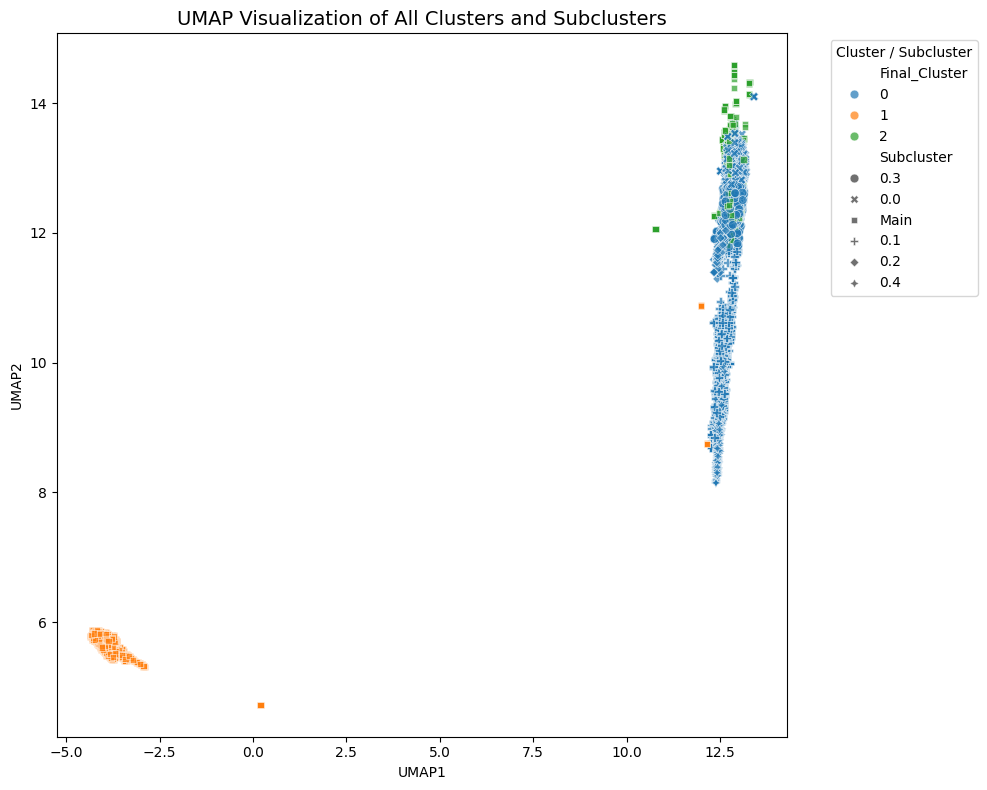

In [14]:
plt.figure(figsize=(10,8))

sns.scatterplot(
    data=umap_all,
    x='UMAP1', y='UMAP2',
    hue='Final_Cluster',
    style='Subcluster',  # Different markers for subclusters
    palette='tab10',
    s=40, alpha=0.7
)

plt.title("UMAP Visualization of All Clusters and Subclusters", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster / Subcluster')
plt.tight_layout()
plt.show()


## 3D Visualization for Main + Sub clusters

In [15]:
fig = px.scatter_3d(
    umap_all,
    x='UMAP1', y='UMAP2', z='UMAP3',
    color='Final_Cluster',
    symbol='Subcluster',
    color_continuous_scale='Viridis',
    title='Interactive 3D UMAP: Clusters and Subclusters',
    hover_data=['Final_Cluster', 'Subcluster']  # optional, shows when hovering
)

fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.update_layout(
    legend=dict(title='Cluster / Subcluster', itemsizing='trace'),
    scene=dict(
        xaxis_title='UMAP1',
        yaxis_title='UMAP2',
        zaxis_title='UMAP3'
    )
)

fig.show()


## Zoomed In View of Subcluster

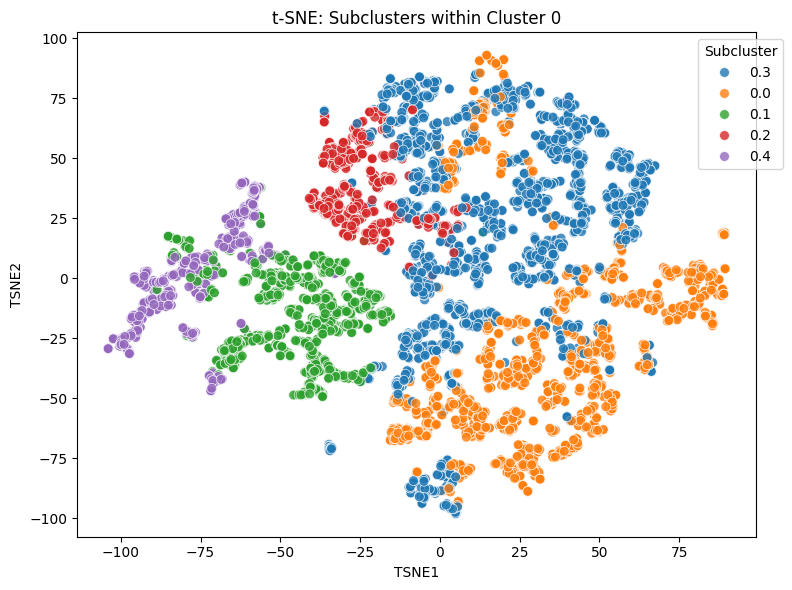

In [16]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Filter to Cluster 0 ---
cluster0_data = umap_all[umap_all['Final_Cluster'] == 0].copy()

# --- 2. Select all UMAP features as t-SNE input ---
umap_cols = [f'UMAP{i}' for i in range(1, 21)]
X = cluster0_data[umap_cols].values

# --- 3. Run t-SNE on Cluster 0’s UMAP features ---
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=20,      # slightly lower since it's a smaller subset
    learning_rate='auto'
)
tsne_result = tsne.fit_transform(X)

# --- 4. Add the t-SNE results ---
cluster0_data['TSNE1'] = tsne_result[:, 0]
cluster0_data['TSNE2'] = tsne_result[:, 1]

# --- 5. Visualize subclusters within Cluster 0 ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=cluster0_data,
    x='TSNE1', y='TSNE2',
    hue='Subcluster',
    palette='tab10',
    s=50, alpha=0.8
)
plt.title("t-SNE: Subclusters within Cluster 0")
plt.legend(title='Subcluster', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


In [18]:
umap_all.columns


Index(['UMAP1', 'UMAP2', 'UMAP3', 'UMAP4', 'UMAP5', 'UMAP6', 'UMAP7', 'UMAP8',
       'UMAP9', 'UMAP10', 'UMAP11', 'UMAP12', 'UMAP13', 'UMAP14', 'UMAP15',
       'UMAP16', 'UMAP17', 'UMAP18', 'UMAP19', 'UMAP20', 'Cluster', 'TSNE1',
       'TSNE2', 'Final_Cluster', 'Subcluster'],
      dtype='object')

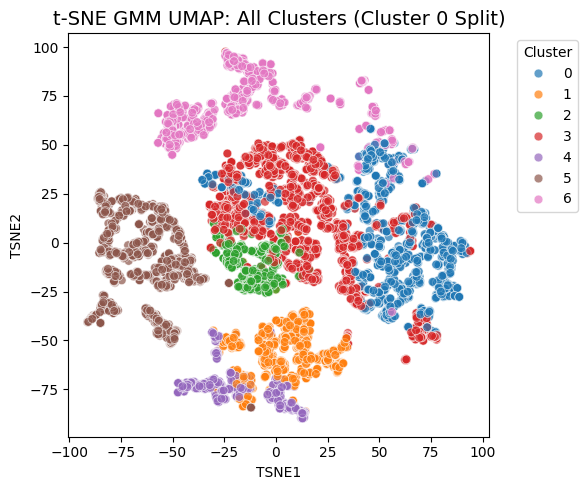

In [33]:
# Create explicit mapping for subclusters (as strings) to whole numbers
subcluster_mapping = {
    '0.0': 0,
    '0.1': 1,
    '0.2': 2,
    '0.3': 3,
    '0.4': 4
}

# Apply mapping - convert subclusters to whole numbers for cluster 0, shift others
umap_all['Combined_Cluster'] = umap_all.apply(
    lambda row: subcluster_mapping[str(row['Subcluster'])] if row['Final_Cluster'] == 0 
                else row['Final_Cluster'] + 4,
    axis=1
)

# Plot combined visualization
plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=umap_all,
    x='TSNE1', y='TSNE2',
    hue='Combined_Cluster',
    palette='tab10',
    s=40,
    alpha=0.7
)

plt.title("t-SNE GMM UMAP: All Clusters (Cluster 0 Split)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster')
plt.tight_layout()
plt.show()

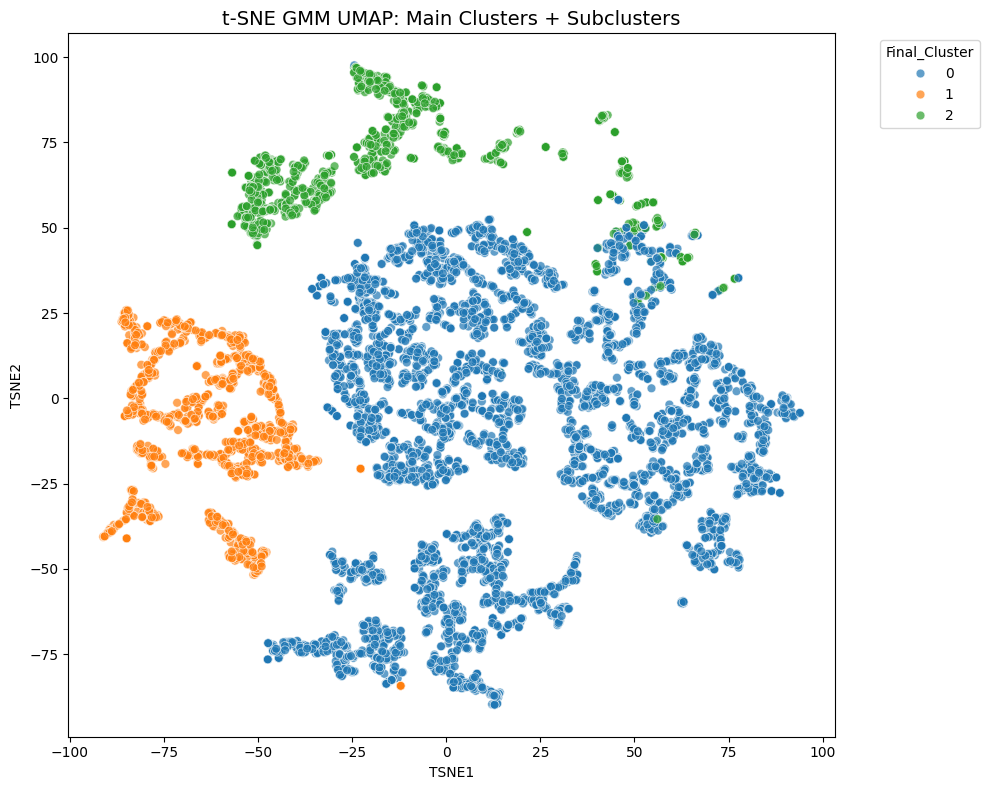

In [ ]:
# --- Plot t-SNE visualization with color representing both ---
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=umap_all,
    x='TSNE1', y='TSNE2',
    hue='Cluster_Label',  # color represents cluster + subcluster
    palette='tab10',           # use a palette with enough distinct colors
    s=40,
    alpha=0.7
)

plt.title("t-SNE GMM UMAP: Main Clusters + Subclusters", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Cluster_Label')
plt.tight_layout()
plt.show()


## Final Cluster Percentages

In [ ]:
# Create unified cluster labels as strings
umap_all['Cluster_Label'] = umap_all.apply(
    lambda row: str(row['Final_Cluster']) if row['Final_Cluster'] != 0 
    else str(row['Final_Cluster']) + '.' + str(row['Subcluster']),
    axis=1
)

# Calculate percentages
cluster_pct = (
    umap_all['Cluster_Label']
    .value_counts(normalize=True)
    .sort_index()
    .mul(100)
    .round(2)
)

print("📊 Percentage of Samples in Each Cluster / Subcluster:")
print(cluster_pct)


📊 Percentage of Samples in Each Cluster / Subcluster:
Cluster_Label
0.0.0    25.51
0.0.1     9.09
0.0.2    10.46
0.0.3    14.47
0.0.4     8.03
1        16.71
2        15.73
Name: proportion, dtype: float64


In [ ]:
umap_all.drop(columns=['Cluster'], inplace=True)

# Analysis for Cluster Profiling

In [ ]:
print("\n[Step 1] Loading original dataset...")

df_original = pd.read_csv('Data/train_dataset.csv')
print(f"✓ Original dataset loaded: {df_original.shape}")


[Step 1] Loading original dataset...
✓ Original dataset loaded: (9442, 46)


In [ ]:
print("\n[Step 2] Extracting cluster labels from dataframes...")

# Extract the cluster columns
umap_clusters = umap_all['Cluster_Label'].values

print(f"✓ UMAP clusters extracted: {len(umap_clusters)} labels")
print(f"  Unique UMAP clusters: {sorted(umap_all['Cluster_Label'].unique())}")


[Step 2] Extracting cluster labels from dataframes...
✓ UMAP clusters extracted: 9442 labels
  Unique UMAP clusters: ['0.0.0', '0.0.1', '0.0.2', '0.0.3', '0.0.4', '1', '2']


In [ ]:
print("\n[Step 3] Verifying data alignment...")

if len(df_original) == len(umap_clusters):
    print(f"✓ All datasets aligned: {len(df_original)} rows")
else:
    print(f"⚠️  WARNING: Row count mismatch!")
    print(f"  Original dataset: {len(df_original)} rows")
    print(f"  UMAP clusters: {len(umap_clusters)} rows")
    print("\n❌ Cannot proceed - datasets must have same number of rows")
    raise ValueError("Dataset size mismatch")


[Step 3] Verifying data alignment...
✓ All datasets aligned: 9442 rows


In [ ]:
print("\n[Step 4] Appending cluster labels to original dataset...")

# Create a copy
df_with_clusters = df_original.copy()

# Add cluster columns
df_with_clusters['umap_clusters'] = umap_clusters

print(f"✓ Added 'umap_clusters' column")



[Step 4] Appending cluster labels to original dataset...
✓ Added 'umap_clusters' column


In [ ]:
print("\n[Step 5] Verifying results...")

print(f"\nDataset shape: {df_with_clusters.shape}")
print(f"Columns added: {list(df_with_clusters.columns[-2:])}")

# Show distribution
print(f"UMAP Cluster Distribution:")
pca_dist = df_with_clusters['umap_clusters'].value_counts().sort_index()
for cluster_id, count in pca_dist.items():
    pct = (count / len(df_with_clusters)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")

# Check for missing values
print(f"\nMissing values check:")
print(f"  umap_clusters: {df_with_clusters['umap_clusters'].isna().sum()}")

# Show sample
print(f"\nSample of data with clusters (first 10 rows):")
print(df_with_clusters[['umap_clusters']].head(10))


[Step 5] Verifying results...

Dataset shape: (9442, 47)
Columns added: ['Age_Group', 'umap_clusters']
UMAP Cluster Distribution:
  Cluster 0.0.0: 2,409 patients (25.5%)
  Cluster 0.0.1: 858 patients (9.1%)
  Cluster 0.0.2: 988 patients (10.5%)
  Cluster 0.0.3: 1,366 patients (14.5%)
  Cluster 0.0.4: 758 patients (8.0%)
  Cluster 1: 1,578 patients (16.7%)
  Cluster 2: 1,485 patients (15.7%)

Missing values check:
  umap_clusters: 0

Sample of data with clusters (first 10 rows):
  umap_clusters
0         0.0.2
1         0.0.3
2         0.0.2
3         0.0.2
4             1
5             1
6         0.0.0
7             1
8             2
9         0.0.1


In [ ]:
df_with_clusters.head()

General_hearing_condition Had_high_blood_pressure  WBC  Haemoglobin  \
0                      Good                     Yes  6.5         14.0   
1                      Good                      No  6.8         13.9   
2                      Good                     Yes  6.5         14.0   
3          A little trouble                     Yes  6.5         14.0   
4                      Good              Unknown/NA  9.3         12.9   

   Platelete  Gender   Age                       Race_Ethnicity  \
0      241.0  Female  71.0                   Non-Hispanic White   
1      264.5    Male  32.0                     Mexican American   
2      241.0  Female  65.0                   Non-Hispanic Black   
3      241.0    Male  74.0                   Non-Hispanic White   
4      439.0    Male   8.0  Other Race - Including Multi-Racial   

                     Country_of_Birth                         Education_Level  \
0  Born in 50 US states or Washington  High school graduate/GED or equivalent   
1                          Unknown/NA  High school graduate/GED or equivalent   
2  Born in 50 US states or Washington  High school graduate/GED or equivalent   
3  Born in 50 US states or Washington               Some college or AA degree   
4  Born in 50 US states or Washington                              Unknown/NA   

   ...      Pulse  BODY_MEASURE_COMPOSITE  blood_macros mean_steroid_ng_dl  \
0  ...  69.333333                0.249125     -0.012353          -0.274090   
1  ...  72.000000                0.318792     -0.049170           0.216401   
2  ...  69.333333                0.475114     -0.012353          -0.274090   
3  ...  69.333333                0.249125     -0.012353          -0.274090   
4  ...  71.666667               -1.817027     -0.148207          -0.680624   

  balance_symptom_score balance_impact_score  fall_risk_score  \
0                     0                  0.0              0.0   
1                     0                  0.0              0.0   
2                     0                  0.0              0.0   
3                     0                  0.0              0.0   
4                     0                  0.0              0.0   

  functional_difficulty_composite Age_Group umap_clusters  
0                 Some difficulty     61-75         0.0.2  
1                   No difficulty     31-45         0.0.3  
2                 Some difficulty     61-75         0.0.2  
3                 Some difficulty     61-75         0.0.2  
4                 Some difficulty      0-18             1  

[5 rows x 47 columns]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS")
print("="*70)

CLUSTER CHARACTERIZATION - EXPLORATORY DATA ANALYSIS


In [ ]:
# ============================================================
# STEP 1: Load Data
# ============================================================
print("\n[Step 1] Loading enhanced dataset...")

df = df_with_clusters.copy()
print(f"✓ Dataset loaded: {df.shape}")
print(f"  Total patients: {len(df):,}")
print(f"  Features: {df.shape[1]}")

# Drop Unnamed: 0 if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns='Unnamed: 0')
    
print(f"✓ Final shape: {df.shape}")


[Step 1] Loading enhanced dataset...
✓ Dataset loaded: (9442, 47)
  Total patients: 9,442
  Features: 47
✓ Final shape: (9442, 47)


In [ ]:
# ============================================================
# STEP 2: Define Feature Categories
# ============================================================
print("\n[Step 2] Categorizing features...")

# Demographic features
demographic_features = ['Gender', 'Age', 'Age_Group', 'Race_Ethnicity', 
                       'Country_of_Birth', 'Education_Level', 'Marital_Status']

# Socioeconomic features
socioeconomic_features = ['Income_to_Poverty_Ratio', 'Family_poverty_level_index',
                         'Household_Size', 'Covered_by_health_insurance', 
                         'Education_Level']

# Health conditions (Yes/No type)
health_conditions = [
    'Has_diabetes', 'Has_Disability', 'Has_Hepatitis', 'Has_Kidney_Failure',
    'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer', 'Had_high_blood_pressure'
]

# Clinical measurements (continuous numeric)
clinical_measurements = [
    'WBC', 'Haemoglobin', 'Platelete', 'HDL_mg', 'Cholestrol_level',
    'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE'
]

# Lifestyle/behavioral
lifestyle_features = [
    'Takes_vitamin_supplements', 
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Number_of_hours_of_sleep'
]

# Health status (categorical)
health_status = [
    'General_health_condition', 'General_hearing_condition',
    'Teeth_and_gum_health', 'Tested_for_HIV_Virus',
    'Received_Hepatitis_A_Vaccine'
]

# Composite scores
composite_scores = [
    'blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
    'balance_impact_score', 'fall_risk_score', 'functional_difficulty_composite'
]

print(f"✓ Feature categories defined")
print(f"  Demographics: {len(demographic_features)}")
print(f"  Socioeconomic: {len(socioeconomic_features)}")
print(f"  Health Conditions: {len(health_conditions)}")
print(f"  Clinical Measurements: {len(clinical_measurements)}")
print(f"  Lifestyle: {len(lifestyle_features)}")
print(f"  Composite Scores: {len(composite_scores)}")


[Step 2] Categorizing features...
✓ Feature categories defined
  Demographics: 7
  Socioeconomic: 5
  Health Conditions: 11
  Clinical Measurements: 9
  Lifestyle: 4
  Composite Scores: 6


In [ ]:
# ============================================================
# STEP 3: Basic Cluster Overview
# ============================================================
print("\n" + "="*70)
print("CLUSTER OVERVIEW - UMAP CLUSTERS")
print("="*70)

n_clusters_pca = df['umap_clusters'].nunique()
print(f"\nTotal UMAP clusters: {n_clusters_pca}")
print(f"\nCluster distribution:")

for cluster_id in sorted(df['umap_clusters'].unique()):
    count = len(df[df['umap_clusters'] == cluster_id])
    pct = (count / len(df)) * 100
    print(f"  Cluster {cluster_id}: {count:,} patients ({pct:.1f}%)")


CLUSTER OVERVIEW - UMAP CLUSTERS

Total UMAP clusters: 7

Cluster distribution:
  Cluster 0.0.0: 2,409 patients (25.5%)
  Cluster 0.0.1: 858 patients (9.1%)
  Cluster 0.0.2: 988 patients (10.5%)
  Cluster 0.0.3: 1,366 patients (14.5%)
  Cluster 0.0.4: 758 patients (8.0%)
  Cluster 1: 1,578 patients (16.7%)
  Cluster 2: 1,485 patients (15.7%)


In [ ]:
# ============================================================
# STEP 4: Cluster Profiling - Demographics
# ============================================================
print("\n" + "="*70)
print("DEMOGRAPHIC PROFILE BY CLUSTER")
print("="*70)

demographic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - DEMOGRAPHICS")
    print(f"{'='*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    cluster_demo = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    # Age
    mean_age = cluster_data['Age'].mean()
    median_age = cluster_data['Age'].median()
    cluster_demo['Mean_Age'] = mean_age
    cluster_demo['Median_Age'] = median_age
    print(f"\nAge:")
    print(f"  Mean: {mean_age:.1f} years")
    print(f"  Median: {median_age:.1f} years")
    print(f"  Range: {cluster_data['Age'].min():.0f} - {cluster_data['Age'].max():.0f} years")
    
    # Age Group
    print(f"\nAge Group Distribution:")
    age_group_dist = cluster_data['Age_Group'].value_counts()
    for age_group, count in age_group_dist.head(3).items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {age_group}: {count:,} ({pct:.1f}%)")
    
    # Gender
    print(f"\nGender Distribution:")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    female_pct = (gender_dist.get('Female', 0) / len(cluster_data)) * 100
    cluster_demo['Male_%'] = male_pct
    cluster_demo['Female_%'] = female_pct
    print(f"  Male: {gender_dist.get('Male', 0):,} ({male_pct:.1f}%)")
    print(f"  Female: {gender_dist.get('Female', 0):,} ({female_pct:.1f}%)")
    
    # Race/Ethnicity
    print(f"\nRace/Ethnicity (Top 3):")
    race_dist = cluster_data['Race_Ethnicity'].value_counts().head(3)
    for race, count in race_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {race}: {count:,} ({pct:.1f}%)")
    
    # Education
    print(f"\nEducation Level (Top 3):")
    edu_dist = cluster_data['Education_Level'].value_counts().head(3)
    for edu, count in edu_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {edu}: {count:,} ({pct:.1f}%)")
    
    # Marital Status
    print(f"\nMarital Status (Top 2):")
    marital_dist = cluster_data['Marital_Status'].value_counts().head(2)
    for status, count in marital_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  {status}: {count:,} ({pct:.1f}%)")
    
    demographic_summary.append(cluster_demo)

demographic_summary_df = pd.DataFrame(demographic_summary)
print("\n✓ Demographic summary created")


DEMOGRAPHIC PROFILE BY CLUSTER

CLUSTER 0.0.0 - DEMOGRAPHICS
Size: 2,409 patients (25.5%)

Age:
  Mean: 51.4 years
  Median: 52.0 years
  Range: 18 - 80 years

Age Group Distribution:
  61-75: 696 (28.9%)
  31-45: 632 (26.2%)
  46-60: 550 (22.8%)

Gender Distribution:
  Male: 1,563 (64.9%)
  Female: 846 (35.1%)

Race/Ethnicity (Top 3):
  Non-Hispanic White: 1,657 (68.8%)
  Non-Hispanic Black: 287 (11.9%)
  Other Race - Including Multi-Racial: 208 (8.6%)

Education Level (Top 3):
  College graduate or above: 975 (40.5%)
  Some college or AA degree: 769 (31.9%)
  High school graduate/GED or equivalent: 452 (18.8%)

Marital Status (Top 2):
  Married/Living with partner: 1,346 (55.9%)
  Never married: 559 (23.2%)

CLUSTER 0.0.1 - DEMOGRAPHICS
Size: 858 patients (9.1%)

Age:
  Mean: 53.6 years
  Median: 56.0 years
  Range: 18 - 80 years

Age Group Distribution:
  61-75: 293 (34.1%)
  46-60: 191 (22.3%)
  31-45: 185 (21.6%)

Gender Distribution:
  Male: 297 (34.6%)
  Female: 561 (65.4%)

Ra

In [ ]:
# ============================================================
# STEP 5: Health Condition Prevalence by Cluster
# ============================================================
print("\n" + "="*70)
print("HEALTH CONDITION PREVALENCE BY CLUSTER")
print("="*70)

health_prevalence = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - HEALTH CONDITIONS")
    print(f"{'='*70}")
    
    cluster_profile = {'Cluster': cluster_id, 'Size': len(cluster_data)}
    
    for condition in health_conditions:
        # Calculate prevalence for 'Yes' responses
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prevalence = (yes_count / len(cluster_data)) * 100
        cluster_profile[condition] = prevalence
        
        if prevalence > 10:  # Only show if prevalence > 10%
            print(f"  {condition}: {prevalence:.1f}%")
    
    health_prevalence.append(cluster_profile)

health_prevalence_df = pd.DataFrame(health_prevalence)
print("\n✓ Health prevalence summary created")


HEALTH CONDITION PREVALENCE BY CLUSTER

CLUSTER 0.0.0 - HEALTH CONDITIONS
  Has_diabetes: 13.2%
  Had_Asthma: 16.9%
  Had_Arthritis: 27.9%
  Had_Thyroid: 10.1%
  Had_Cancer: 13.4%
  Had_high_blood_pressure: 36.0%

CLUSTER 0.0.1 - HEALTH CONDITIONS
  Has_Disability: 10.0%
  Had_Asthma: 14.2%
  Had_Arthritis: 26.2%
  Had_Thyroid: 12.0%
  Had_Cancer: 13.8%
  Had_high_blood_pressure: 32.5%

CLUSTER 0.0.2 - HEALTH CONDITIONS
  Had_Asthma: 16.2%
  Had_Arthritis: 42.9%
  Had_Thyroid: 22.2%
  Had_Cancer: 24.6%
  Had_high_blood_pressure: 42.4%

CLUSTER 0.0.3 - HEALTH CONDITIONS
  Has_Disability: 11.5%
  Had_Asthma: 18.7%
  Had_high_blood_pressure: 12.2%

CLUSTER 0.0.4 - HEALTH CONDITIONS
  Has_diabetes: 17.3%
  Has_Disability: 25.1%
  Had_Asthma: 18.2%
  Had_Arthritis: 35.9%
  Had_Thyroid: 13.3%
  Had_Cancer: 14.6%
  Had_high_blood_pressure: 45.3%

CLUSTER 1 - HEALTH CONDITIONS
  Had_Asthma: 17.8%

CLUSTER 2 - HEALTH CONDITIONS
  Has_diabetes: 31.3%
  Has_Disability: 67.3%
  Had_Asthma: 21.2%


In [ ]:
# ============================================================
# STEP 6: Clinical Measurements by Cluster
# ============================================================
print("\n" + "="*70)
print("CLINICAL MEASUREMENTS BY CLUSTER")
print("="*70)

clinical_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - CLINICAL MEASUREMENTS")
    print(f"{'='*70}")
    
    cluster_clinical = {'Cluster': cluster_id}
    
    for measure in clinical_measurements:
        mean_val = cluster_data[measure].mean()
        std_val = cluster_data[measure].std()
        median_val = cluster_data[measure].median()
        cluster_clinical[f'{measure}_mean'] = mean_val
        cluster_clinical[f'{measure}_std'] = std_val
        cluster_clinical[f'{measure}_median'] = median_val
        print(f"  {measure}: {mean_val:.2f} ± {std_val:.2f} (median: {median_val:.2f})")
    
    clinical_summary.append(cluster_clinical)

clinical_summary_df = pd.DataFrame(clinical_summary)
print("\n✓ Clinical measurements summary created")


CLINICAL MEASUREMENTS BY CLUSTER

CLUSTER 0.0.0 - CLINICAL MEASUREMENTS
  WBC: 6.98 ± 1.82 (median: 6.70)
  Haemoglobin: 14.17 ± 1.20 (median: 14.10)
  Platelete: 253.46 ± 58.44 (median: 254.00)
  HDL_mg: 51.21 ± 10.17 (median: 52.00)
  Cholestrol_level: 184.50 ± 35.46 (median: 186.00)
  SystolicBP: 121.85 ± 14.47 (median: 121.33)
  DiastolicBP: 75.01 ± 9.50 (median: 74.33)
  Pulse: 71.19 ± 10.93 (median: 70.67)
  BODY_MEASURE_COMPOSITE: 0.41 ± 0.49 (median: 0.32)

CLUSTER 0.0.1 - CLINICAL MEASUREMENTS
  WBC: 6.62 ± 1.92 (median: 6.40)
  Haemoglobin: 13.67 ± 1.65 (median: 13.70)
  Platelete: 254.63 ± 66.58 (median: 249.00)
  HDL_mg: 58.36 ± 13.85 (median: 56.00)
  Cholestrol_level: 188.50 ± 38.40 (median: 187.00)
  SystolicBP: 122.47 ± 17.39 (median: 120.17)
  DiastolicBP: 74.54 ± 10.51 (median: 73.33)
  Pulse: 70.63 ± 11.49 (median: 69.67)
  BODY_MEASURE_COMPOSITE: 0.14 ± 0.54 (median: 0.12)

CLUSTER 0.0.2 - CLINICAL MEASUREMENTS
  WBC: 6.38 ± 1.47 (median: 6.50)
  Haemoglobin: 13.43

In [ ]:
# ============================================================
# STEP 7: Lifestyle & Behavioral Patterns
# ============================================================
print("\n" + "="*70)
print("LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER")
print("="*70)

lifestyle_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - LIFESTYLE")
    print(f"{'='*70}")
    
    cluster_lifestyle = {'Cluster': cluster_id}
    
    # Physical activity - filter out special values
    mod_activity_data = cluster_data['Number_of_Moderate_Physical_activities_per_week']
    mod_activity_clean = mod_activity_data[(mod_activity_data >= 0) & (mod_activity_data < 100)]
    if len(mod_activity_clean) > 0:
        mod_activity = mod_activity_clean.mean()
        cluster_lifestyle['Moderate_Activity'] = mod_activity
        print(f"  Moderate activity (avg): {mod_activity:.1f} times/week")
    
    vig_activity_data = cluster_data['Number_of_Vigorous_Physical_activities_per_week']
    vig_activity_clean = vig_activity_data[(vig_activity_data >= 0) & (vig_activity_data < 100)]
    if len(vig_activity_clean) > 0:
        vig_activity = vig_activity_clean.mean()
        cluster_lifestyle['Vigorous_Activity'] = vig_activity
        print(f"  Vigorous activity (avg): {vig_activity:.1f} times/week")
    
    # Sleep
    sleep = cluster_data['Number_of_hours_of_sleep'].mean()
    cluster_lifestyle['Hours_of_Sleep'] = sleep
    print(f"  Sleep (avg): {sleep:.1f} hours/night")
    
    # Vitamin supplements
    vit_count = (cluster_data['Takes_vitamin_supplements'] == 'Yes').sum()
    vit_pct = (vit_count / len(cluster_data)) * 100
    cluster_lifestyle['Takes_Vitamins_%'] = vit_pct
    print(f"  Takes vitamins: {vit_pct:.1f}%")
    
    # General health
    print(f"\n  General Health Status:")
    health_dist = cluster_data['General_health_condition'].value_counts()
    for status in ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']:
        if status in health_dist.index:
            count = health_dist[status]
            pct = (count / len(cluster_data)) * 100
            print(f"    {status}: {pct:.1f}%")
    
    # Hearing
    print(f"\n  Hearing Condition:")
    hearing_dist = cluster_data['General_hearing_condition'].value_counts().head(3)
    for condition, count in hearing_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {condition}: {pct:.1f}%")
    
    lifestyle_summary.append(cluster_lifestyle)

lifestyle_summary_df = pd.DataFrame(lifestyle_summary)
print("\n✓ Lifestyle summary created")


LIFESTYLE & BEHAVIORAL PATTERNS BY CLUSTER

CLUSTER 0.0.0 - LIFESTYLE
  Moderate activity (avg): 2.9 times/week
  Vigorous activity (avg): 1.4 times/week
  Sleep (avg): 7.6 hours/night
  Takes vitamins: 2.1%

  General Health Status:
    Excellent: 14.4%
    Very good: 36.3%
    Good: 36.2%
    Fair: 11.2%
    Poor: 1.7%

  Hearing Condition:
    Good: 41.1%
    Excellent: 31.5%
    A little trouble: 15.6%

CLUSTER 0.0.1 - LIFESTYLE
  Moderate activity (avg): 2.8 times/week
  Vigorous activity (avg): 1.3 times/week
  Sleep (avg): 7.6 hours/night
  Takes vitamins: 3.1%

  General Health Status:
    Excellent: 17.0%
    Very good: 38.7%
    Good: 33.4%
    Fair: 9.7%
    Poor: 1.2%

  Hearing Condition:
    Good: 42.3%
    Excellent: 34.6%
    A little trouble: 14.3%

CLUSTER 0.0.2 - LIFESTYLE
  Moderate activity (avg): 3.2 times/week
  Vigorous activity (avg): 1.4 times/week
  Sleep (avg): 7.8 hours/night
  Takes vitamins: 3.6%

  General Health Status:
    Excellent: 19.8%
    Very go

In [ ]:
# ============================================================
# STEP 8: Socioeconomic Profile
# ============================================================
print("\n" + "="*70)
print("SOCIOECONOMIC PROFILE BY CLUSTER")
print("="*70)

socioeconomic_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - SOCIOECONOMIC STATUS")
    print(f"{'='*70}")
    
    cluster_ses = {'Cluster': cluster_id}
    
    # Income to poverty ratio - filter out invalid values
    income_data = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_data[(income_data > 0) & (income_data <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        cluster_ses['Income_to_Poverty_Ratio'] = income_ratio
        print(f"  Income to Poverty Ratio (avg): {income_ratio:.2f}")
        
        # Categorize SES
        if income_ratio < 1.3:
            ses_level = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_level = "Low SES"
        elif income_ratio < 3.0:
            ses_level = "Middle SES"
        else:
            ses_level = "High SES"
        cluster_ses['SES_Level'] = ses_level
        print(f"  SES Level: {ses_level}")
    
    # Health insurance
    insurance_count = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum()
    insurance_pct = (insurance_count / len(cluster_data)) * 100
    cluster_ses['Has_Insurance_%'] = insurance_pct
    print(f"  Has Health Insurance: {insurance_pct:.1f}%")
    
    # Household size
    household = cluster_data['Household_Size'].mean()
    cluster_ses['Household_Size'] = household
    print(f"  Household Size (avg): {household:.1f} people")
    
    socioeconomic_summary.append(cluster_ses)

socioeconomic_summary_df = pd.DataFrame(socioeconomic_summary)
print("\n✓ Socioeconomic summary created")


SOCIOECONOMIC PROFILE BY CLUSTER

CLUSTER 0.0.0 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.27
  SES Level: High SES
  Has Health Insurance: 93.8%
  Household Size (avg): 2.4 people

CLUSTER 0.0.1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.16
  SES Level: High SES
  Has Health Insurance: 91.0%
  Household Size (avg): 2.8 people

CLUSTER 0.0.2 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 3.37
  SES Level: High SES
  Has Health Insurance: 97.2%
  Household Size (avg): 2.0 people

CLUSTER 0.0.3 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.13
  SES Level: Middle SES
  Has Health Insurance: 81.1%
  Household Size (avg): 3.6 people

CLUSTER 0.0.4 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.69
  SES Level: Middle SES
  Has Health Insurance: 91.3%
  Household Size (avg): 2.4 people

CLUSTER 1 - SOCIOECONOMIC STATUS
  Income to Poverty Ratio (avg): 2.31
  SES Level: Middle SES
  Has Health Insurance: 94.7%
  Household Size (avg

In [ ]:
# ============================================================
# STEP 9: Composite Scores
# ============================================================
print("\n" + "="*70)
print("COMPOSITE HEALTH SCORES BY CLUSTER")
print("="*70)

composite_summary = []

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id} - COMPOSITE SCORES")
    print(f"{'='*70}")
    
    cluster_composite = {'Cluster': cluster_id}
    
    # Numeric composite scores
    numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                         'balance_impact_score', 'fall_risk_score']
    
    for score in numeric_composites:
        # Filter out extreme outliers (fall_risk_score has values like 365, 376)
        if score == 'fall_risk_score':
            score_data = cluster_data[score]
            score_clean = score_data[score_data < 100]  # Reasonable values only
            if len(score_clean) > 0:
                mean_score = score_clean.mean()
                std_score = score_clean.std()
                cluster_composite[score] = mean_score
                print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
        else:
            mean_score = cluster_data[score].mean()
            std_score = cluster_data[score].std()
            cluster_composite[score] = mean_score
            print(f"  {score}: {mean_score:.2f} ± {std_score:.2f}")
    
    # Categorical composite
    print(f"\n  Functional Difficulty:")
    func_diff = cluster_data['functional_difficulty_composite'].value_counts()
    for difficulty, count in func_diff.items():
        pct = (count / len(cluster_data)) * 100
        print(f"    {difficulty}: {pct:.1f}%")
    
    composite_summary.append(cluster_composite)

composite_summary_df = pd.DataFrame(composite_summary)
print("\n✓ Composite scores summary created")


COMPOSITE HEALTH SCORES BY CLUSTER

CLUSTER 0.0.0 - COMPOSITE SCORES
  blood_macros: -0.14 ± 0.21
  mean_steroid_ng_dl: 0.15 ± 0.72
  balance_symptom_score: 0.76 ± 1.48
  balance_impact_score: 0.56 ± 1.28
  fall_risk_score: 1.69 ± 4.31

  Functional Difficulty:
    Some difficulty: 66.7%
    No difficulty: 28.8%
    A lot of difficulty: 4.4%
    Very Severe Difficulty: 0.1%

CLUSTER 0.0.1 - COMPOSITE SCORES
  blood_macros: 0.39 ± 0.18
  mean_steroid_ng_dl: -0.04 ± 0.45
  balance_symptom_score: 0.55 ± 1.22
  balance_impact_score: 0.41 ± 1.06
  fall_risk_score: 1.30 ± 3.36

  Functional Difficulty:
    Some difficulty: 57.2%
    No difficulty: 31.7%
    A lot of difficulty: 10.0%
    Very Severe Difficulty: 1.0%

CLUSTER 0.0.2 - COMPOSITE SCORES
  blood_macros: -0.15 ± 0.20
  mean_steroid_ng_dl: -0.32 ± 0.22
  balance_symptom_score: 0.40 ± 1.06
  balance_impact_score: 0.34 ± 1.03
  fall_risk_score: 1.13 ± 2.43

  Functional Difficulty:
    Some difficulty: 69.2%
    No difficulty: 26.7%

In [ ]:
health_prevalence_df.head()

Cluster  Size  Has_diabetes  Has_Disability  Has_Hepatitis  \
0   0.0.0  2409     13.242009        3.985056       0.913242   
1   0.0.1   858      6.993007       10.023310       2.097902   
2   0.0.2   988      9.210526        2.834008       1.214575   
3   0.0.3  1366      4.465593       11.493411       0.951684   
4   0.0.4   758     17.282322       25.065963       1.715040   

   Has_Kidney_Failure  Had_Asthma  Had_Arthritis  Had_heart_attack  \
0            2.407638   16.894977      27.853881          3.819012   
1            2.680653   14.219114      26.223776          2.913753   
2            3.542510   16.194332      42.914980          2.935223   
3            1.171303   18.740849       5.270864          0.512445   
4            5.277045   18.205805      35.883905          6.200528   

   Had_Thyroid  Had_Liver_COndition  Had_Cancer  Had_high_blood_pressure  
0    10.128684             4.358655   13.408053                35.990037  
1    12.004662             5.011655   13.752914                32.517483  
2    22.165992             2.834008   24.595142                42.408907  
3     5.417277             2.562225    1.830161                12.225476  
4    13.324538             9.102902   14.643799                45.250660


CREATING VISUALIZATIONS


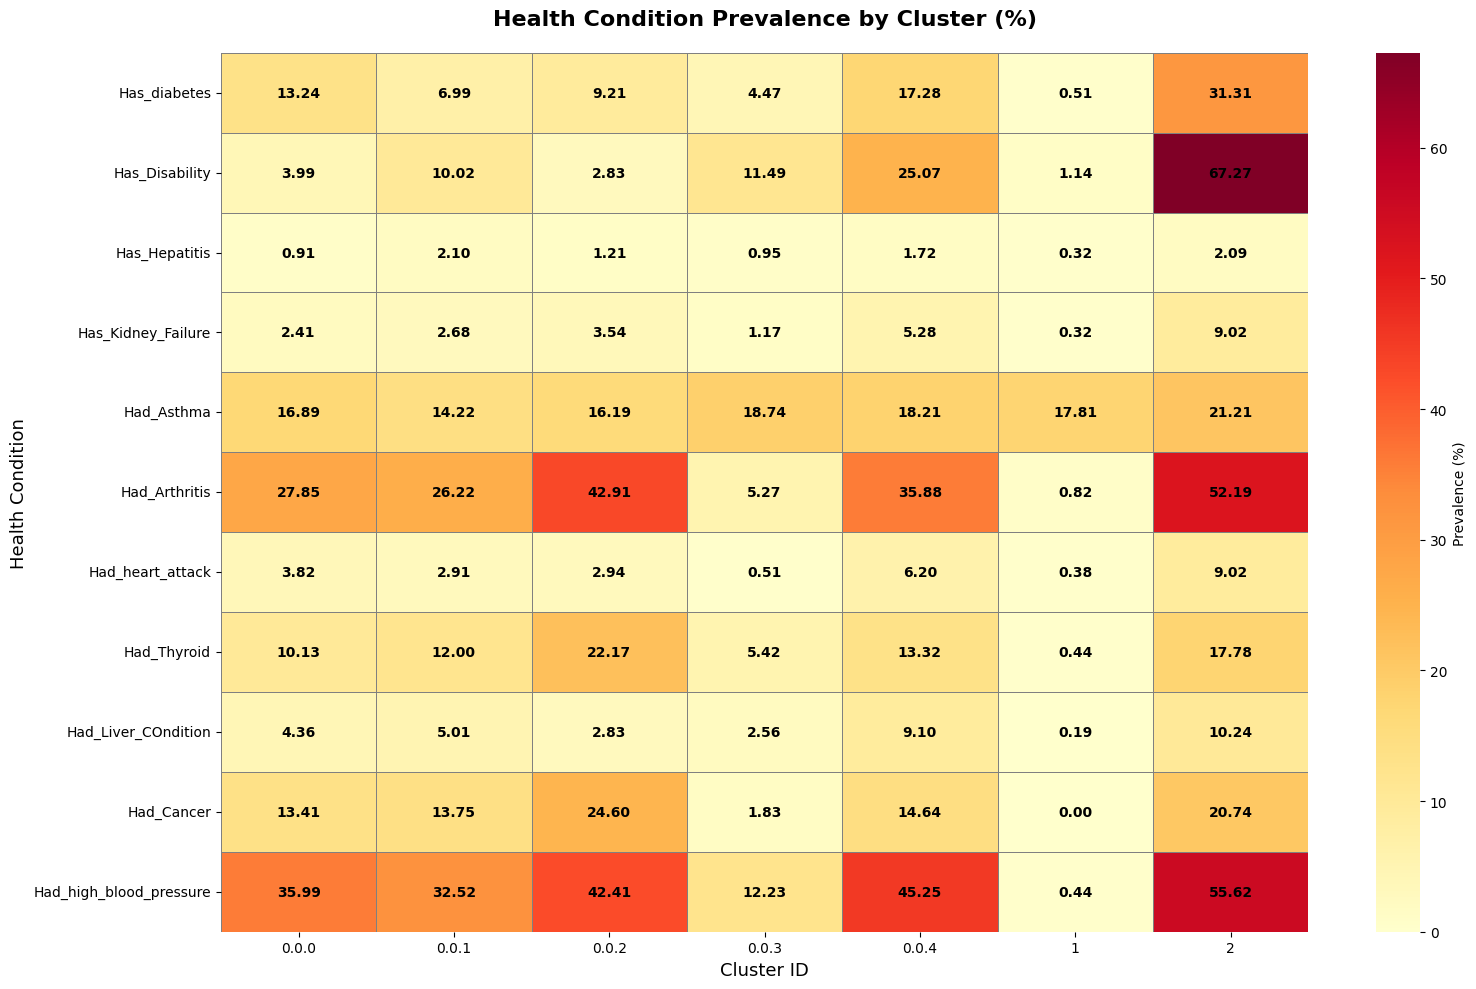

In [ ]:
# ============================================================
# STEP 10: Create Visualization - Health Condition Heatmap
# ============================================================
print("\n" + "="*70)
print("CREATING VISUALIZATIONS")
print("="*70)


plt.figure(figsize=(16, 10))
health_matrix = health_prevalence_df.set_index('Cluster').drop(columns=['Size'])

# Create heatmap with NO automatic annotation
ax = sns.heatmap(health_matrix.T, annot=False, cmap='YlOrRd',
                 linewidths=0.5, linecolor='gray',
                 cbar_kws={'label': 'Prevalence (%)'})

# Manually add all text annotations
for i in range(health_matrix.T.shape[0]):
    for j in range(health_matrix.T.shape[1]):
        value = health_matrix.T.iloc[i, j]
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}',
                ha='center', va='center',
                color='black', fontsize=10, weight='bold')

plt.title('Health Condition Prevalence by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Health Condition', fontsize=13)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

✓ Saved: cluster_age_distribution.png


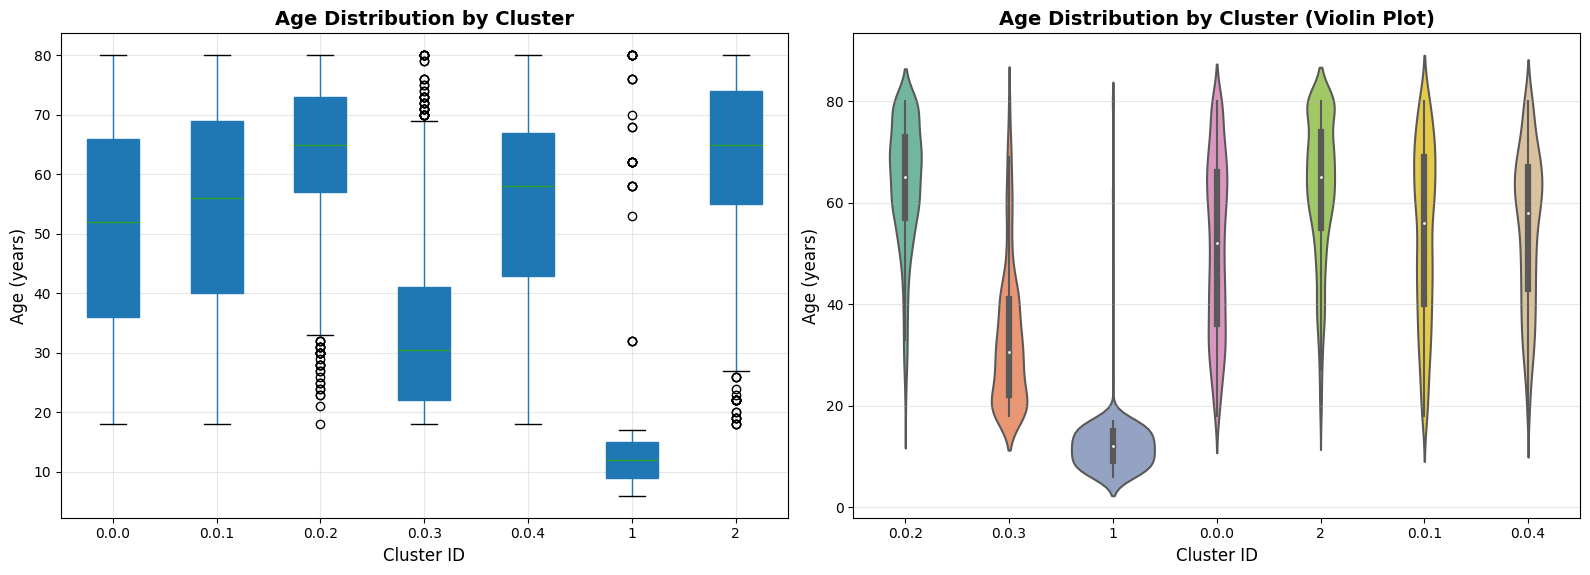

In [ ]:
# ============================================================
# STEP 11: Age Distribution by Cluster
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot
df.boxplot(column='Age', by='umap_clusters', ax=axes[0], patch_artist=True)
axes[0].set_title('Age Distribution by Cluster', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster ID', fontsize=12)
axes[0].set_ylabel('Age (years)', fontsize=12)
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

# Violin plot
sns.violinplot(data=df, x='umap_clusters', y='Age', ax=axes[1], palette='Set2')
axes[1].set_title('Age Distribution by Cluster (Violin Plot)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster ID', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_age_distribution.png")
plt.show()

✓ Saved: cluster_clinical_measurements.png


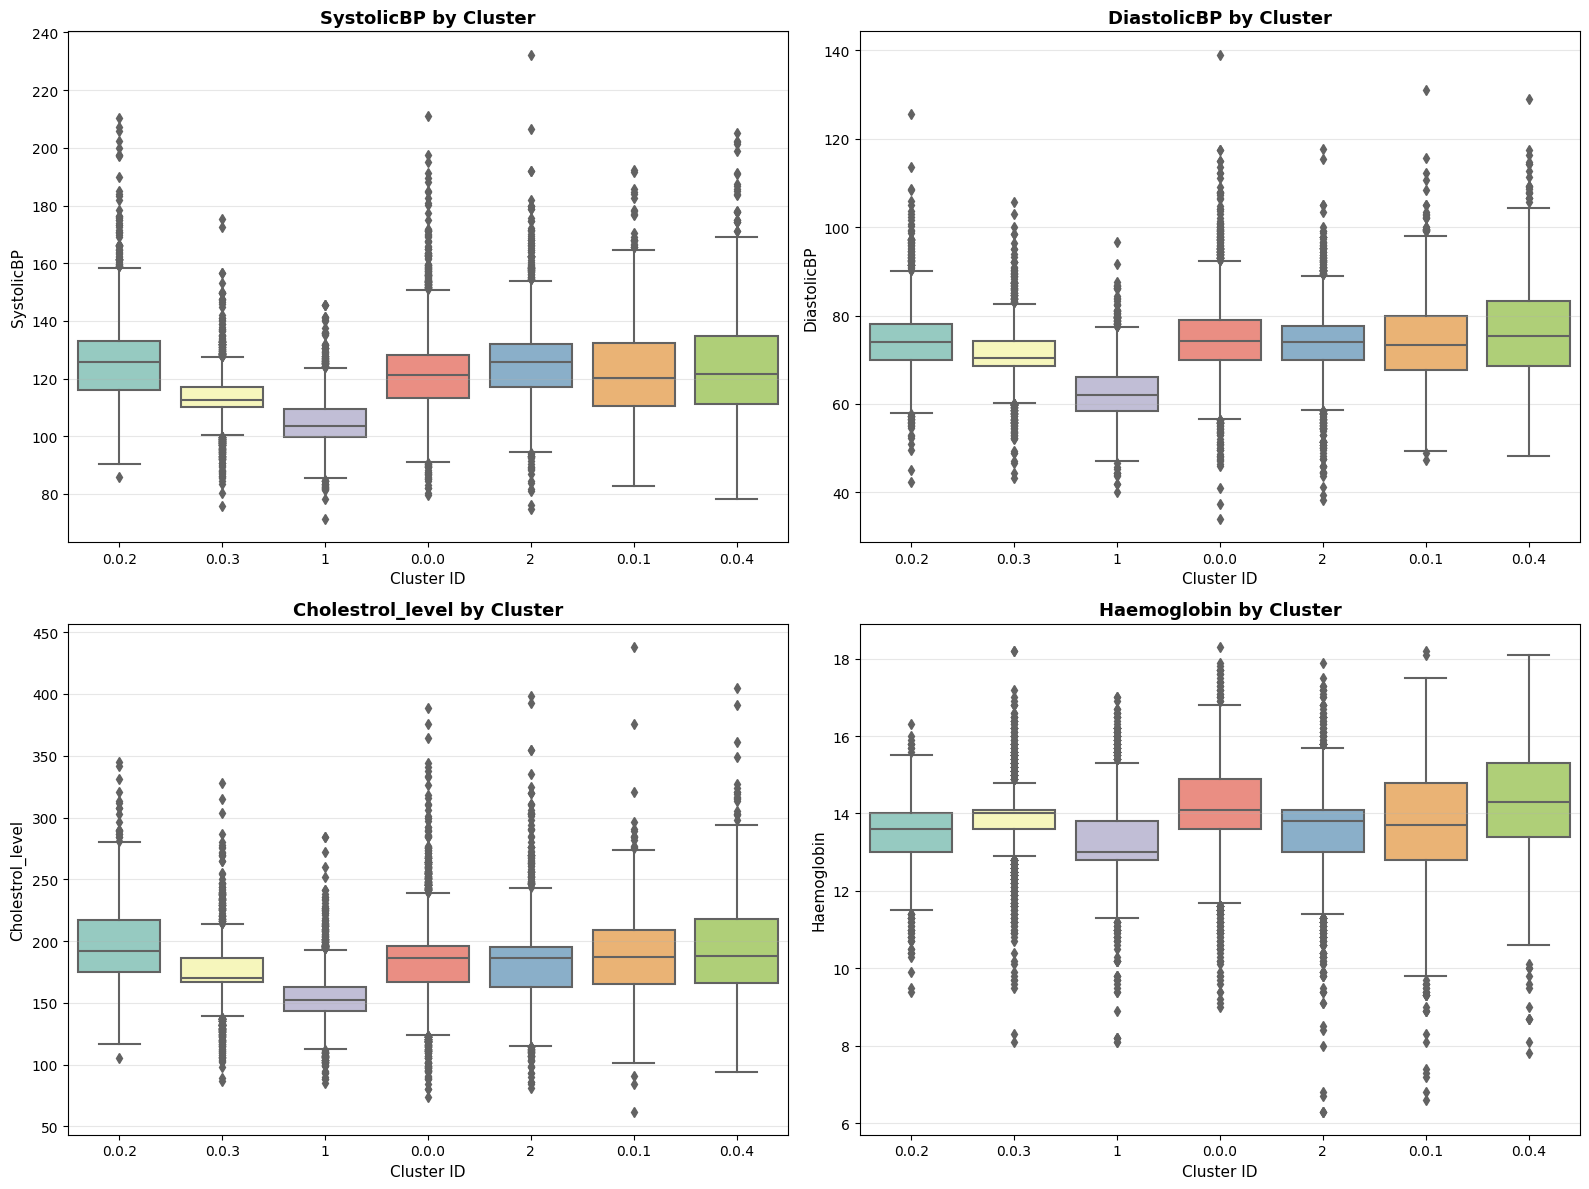

In [ ]:
# ============================================================
# STEP 12: Clinical Measurements Comparison
# ============================================================
key_clinical = ['SystolicBP', 'DiastolicBP', 'Cholestrol_level', 'Haemoglobin']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, measure in enumerate(key_clinical):
    sns.boxplot(data=df, x='umap_clusters', y=measure, ax=axes[idx], palette='Set3')
    axes[idx].set_title(f'{measure} by Cluster', fontsize=13, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=11)
    axes[idx].set_ylabel(measure, fontsize=11)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_clinical_measurements.png")
plt.show()

✓ Saved: cluster_gender_distribution.png


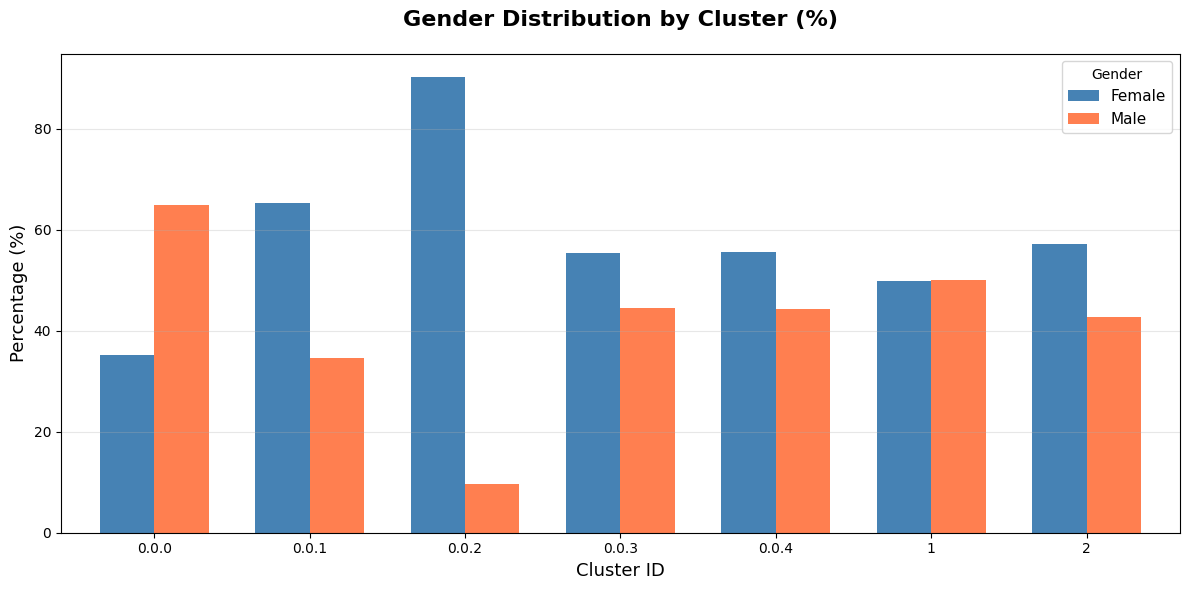

In [ ]:
# ============================================================
# STEP 13: Gender Distribution by Cluster
# ============================================================
gender_cluster = pd.crosstab(df['umap_clusters'], df['Gender'], normalize='index') * 100

fig, ax = plt.subplots(figsize=(12, 6))
gender_cluster.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'], width=0.7)
plt.title('Gender Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Gender', fontsize=11)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_gender_distribution.png")
plt.show()

✓ Saved: cluster_general_health_distribution.png


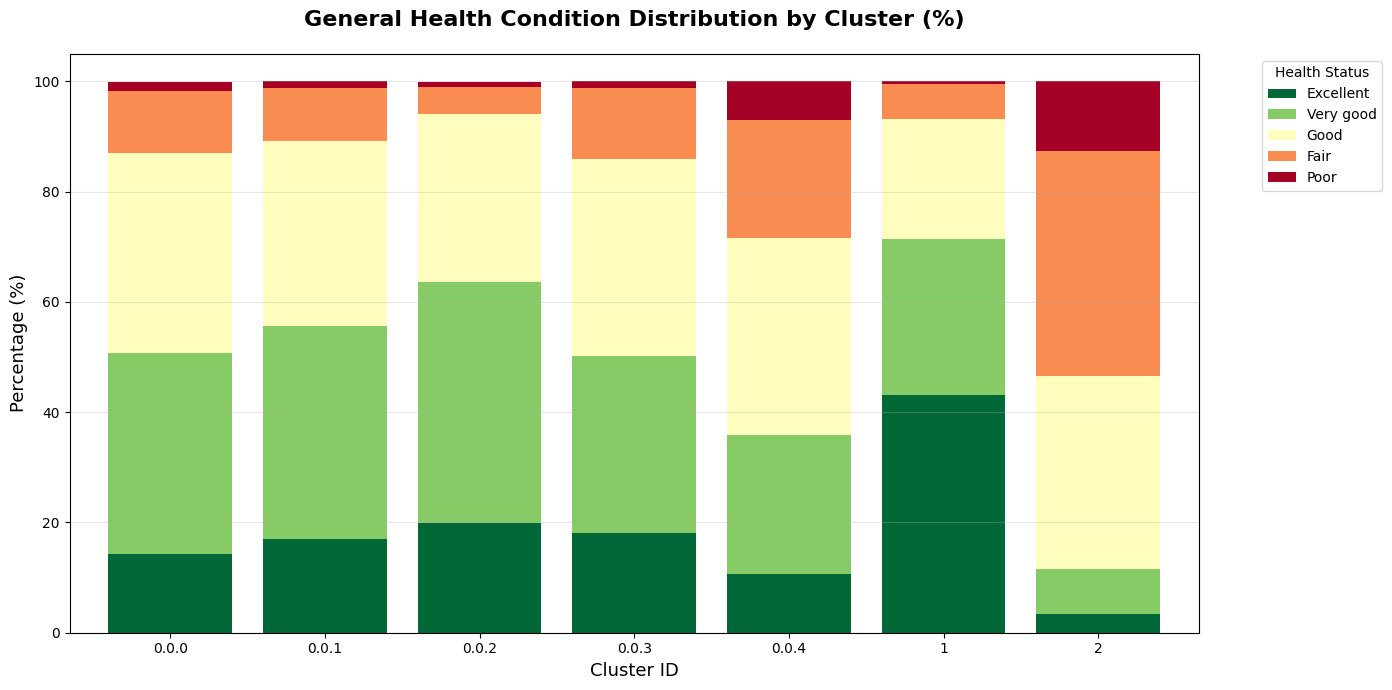

In [ ]:
# ============================================================
# STEP 14: General Health Status by Cluster
# ============================================================
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
health_by_cluster = pd.crosstab(df['umap_clusters'], df['General_health_condition'], 
                                normalize='index') * 100

# Reorder columns
health_by_cluster = health_by_cluster.reindex(columns=[col for col in health_order if col in health_by_cluster.columns])

fig, ax = plt.subplots(figsize=(14, 7))
health_by_cluster.plot(kind='bar', stacked=True, ax=ax, 
                       colormap='RdYlGn_r', width=0.8)
plt.title('General Health Condition Distribution by Cluster (%)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster ID', fontsize=13)
plt.ylabel('Percentage (%)', fontsize=13)
plt.legend(title='Health Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
print("✓ Saved: cluster_general_health_distribution.png")
plt.show()

✓ Saved: cluster_composite_scores.png


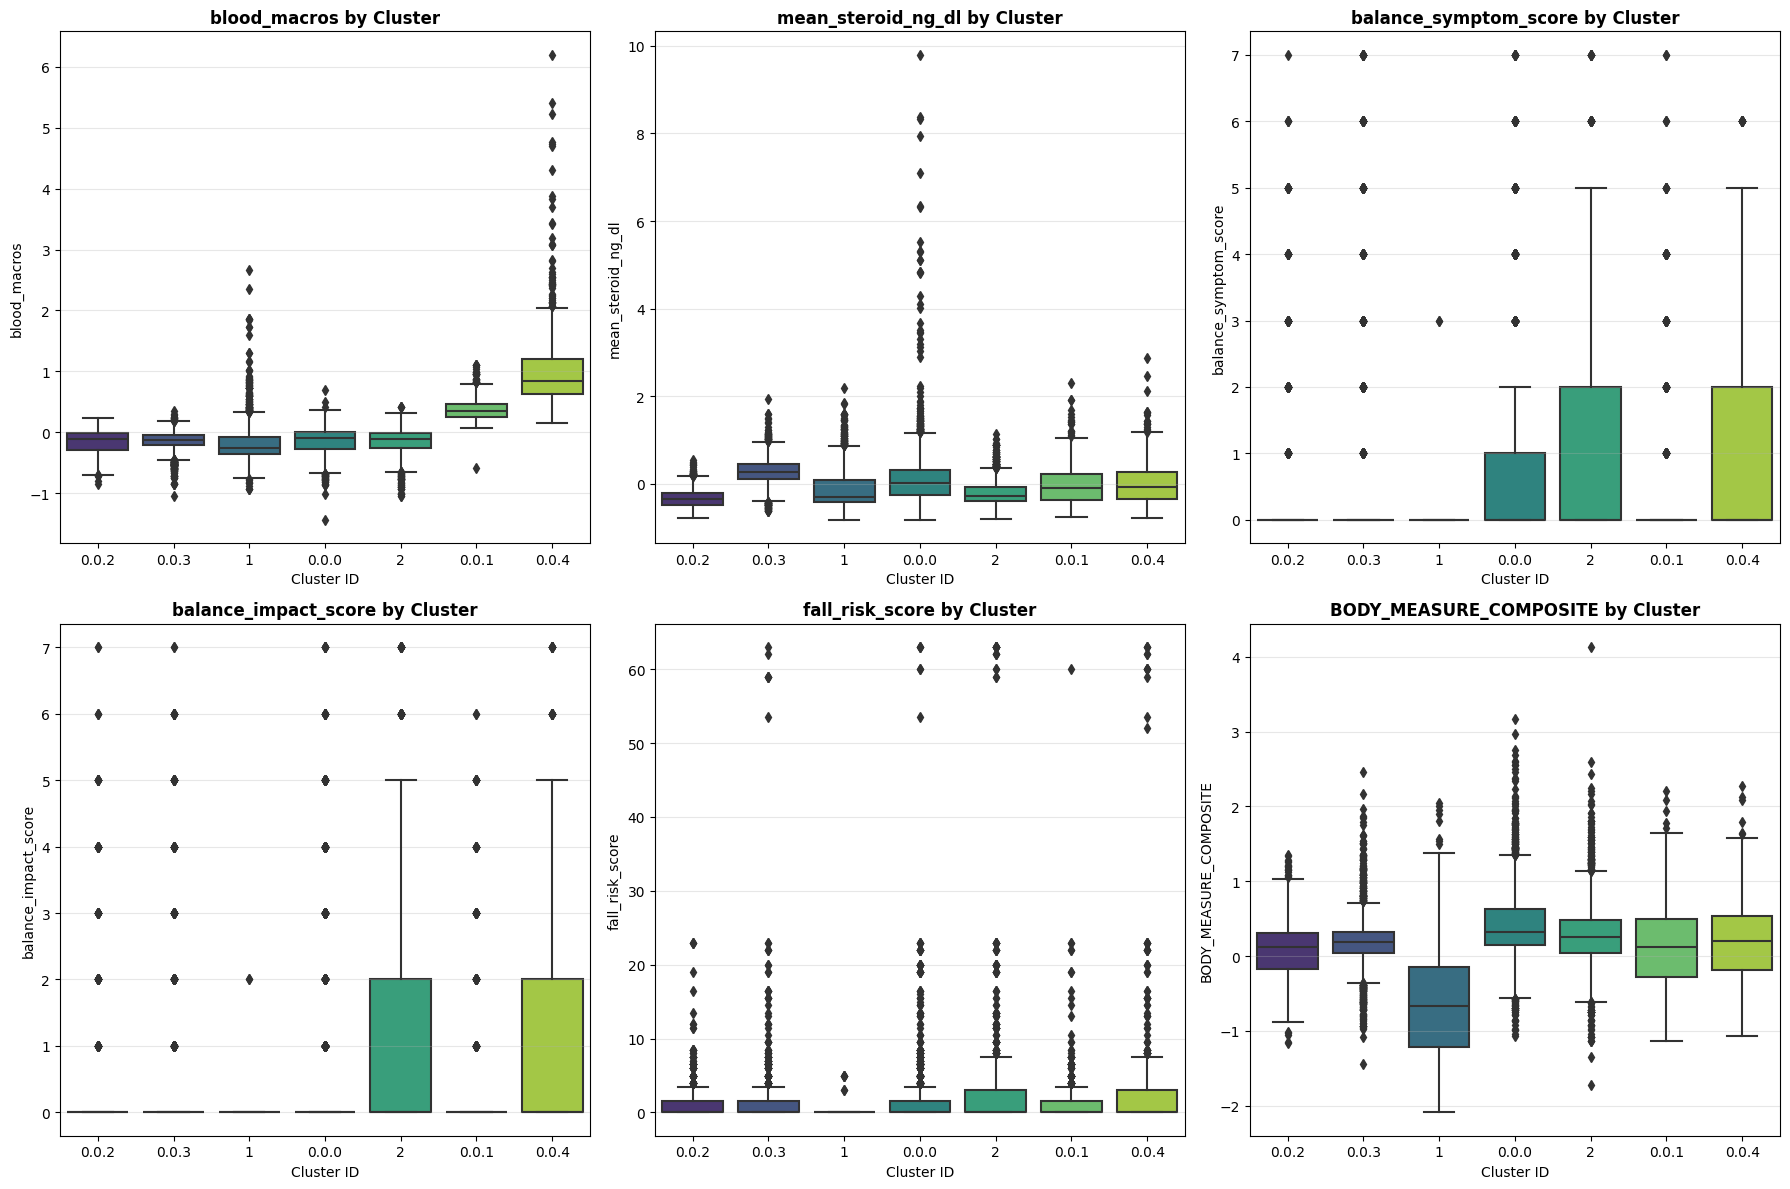

In [ ]:
# ============================================================
# STEP 15: Composite Scores Comparison
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

numeric_composites = ['blood_macros', 'mean_steroid_ng_dl', 'balance_symptom_score',
                     'balance_impact_score', 'fall_risk_score', 'BODY_MEASURE_COMPOSITE']

for idx, score in enumerate(numeric_composites):
    if score == 'fall_risk_score':
        # Filter outliers for visualization
        plot_data = df[df[score] < 100]
    else:
        plot_data = df
    
    sns.boxplot(data=plot_data, x='umap_clusters', y=score, ax=axes[idx], palette='viridis')
    axes[idx].set_title(f'{score} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Cluster ID', fontsize=10)
    axes[idx].set_ylabel(score, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
print("✓ Saved: cluster_composite_scores.png")
plt.show()

In [ ]:
# ============================================================
# STEP 17: Create Cluster Archetypes Summary
# ============================================================
print("\n" + "="*70)
print("CLUSTER ARCHETYPES - DETAILED SUMMARY")
print("="*70)

for cluster_id in sorted(df['umap_clusters'].unique()):
    cluster_data = df[df['umap_clusters'] == cluster_id]
    
    print(f"\n{'#'*70}")
    print(f"CLUSTER {cluster_id} ARCHETYPE")
    print(f"{'#'*70}")
    print(f"Size: {len(cluster_data):,} patients ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Demographics
    print(f"\n📊 DEMOGRAPHICS:")
    print(f"  Average Age: {cluster_data['Age'].mean():.0f} years")
    gender_dist = cluster_data['Gender'].value_counts()
    male_pct = (gender_dist.get('Male', 0) / len(cluster_data)) * 100
    print(f"  Gender: {male_pct:.0f}% Male, {100-male_pct:.0f}% Female")
    
    # Top health conditions
    print(f"\n🏥 TOP HEALTH CONDITIONS (>20% prevalence):")
    has_conditions = False
    for condition in health_conditions:
        yes_count = (cluster_data[condition] == 'Yes').sum()
        prev = (yes_count / len(cluster_data)) * 100
        if prev > 20:
            print(f"  - {condition.replace('_', ' ')}: {prev:.1f}%")
            has_conditions = True
    if not has_conditions:
        print(f"  - No major health conditions >20% prevalence")
    
    # Clinical highlights
    print(f"\n💉 CLINICAL HIGHLIGHTS:")
    print(f"  Blood Pressure: {cluster_data['SystolicBP'].mean():.0f}/{cluster_data['DiastolicBP'].mean():.0f} mmHg")
    print(f"  Cholesterol: {cluster_data['Cholestrol_level'].mean():.0f} mg/dL")
    print(f"  Hemoglobin: {cluster_data['Haemoglobin'].mean():.1f} g/dL")
    
    # Socioeconomic
    income_clean = cluster_data['Income_to_Poverty_Ratio']
    income_clean = income_clean[(income_clean > 0) & (income_clean <= 5)]
    if len(income_clean) > 0:
        income_ratio = income_clean.mean()
        if income_ratio < 1.3:
            ses_label = "Below Poverty Line"
        elif income_ratio < 2.0:
            ses_label = "Low SES"
        elif income_ratio < 3.0:
            ses_label = "Middle SES"
        else:
            ses_label = "High SES"
        print(f"\n💰 SOCIOECONOMIC STATUS:")
        print(f"  Income/Poverty Ratio: {income_ratio:.2f} ({ses_label})")
        insurance_pct = (cluster_data['Covered_by_health_insurance'] == 'Yes').sum() / len(cluster_data) * 100
        print(f"  Health Insurance: {insurance_pct:.0f}%")
    
    # General health
    print(f"\n🌟 GENERAL HEALTH STATUS:")
    health_dist = cluster_data['General_health_condition'].value_counts().head(3)
    for status, count in health_dist.items():
        pct = (count / len(cluster_data)) * 100
        print(f"  - {status}: {pct:.0f}%")
    
    print(f"\n{'-'*70}")


CLUSTER ARCHETYPES - DETAILED SUMMARY

######################################################################
CLUSTER 0.0.0 ARCHETYPE
######################################################################
Size: 2,409 patients (25.5%)

📊 DEMOGRAPHICS:
  Average Age: 51 years
  Gender: 65% Male, 35% Female

🏥 TOP HEALTH CONDITIONS (>20% prevalence):
  - Had Arthritis: 27.9%
  - Had high blood pressure: 36.0%

💉 CLINICAL HIGHLIGHTS:
  Blood Pressure: 122/75 mmHg
  Cholesterol: 185 mg/dL
  Hemoglobin: 14.2 g/dL

💰 SOCIOECONOMIC STATUS:
  Income/Poverty Ratio: 3.27 (High SES)
  Health Insurance: 94%

🌟 GENERAL HEALTH STATUS:
  - Very good: 36%
  - Good: 36%
  - Excellent: 14%

----------------------------------------------------------------------

######################################################################
CLUSTER 0.0.1 ARCHETYPE
######################################################################
Size: 858 patients (9.1%)

📊 DEMOGRAPHICS:
  Average Age: 54 years
  Gender: 35%

## 📋 CLUSTER PROFILES (Clinical & Health Status Focus)

---

### **CLUSTER 1: "Minimal Disease Burden" (16.7%, n=1,578)**

**Health Profile:**
- **Overall Health Status:** Exceptional (43% excellent, 28% very good, 22% good)
- **Chronic Conditions:** Near-zero prevalence across all conditions
- **Clinical Metrics:** 
  - Blood Pressure: 105/63 mmHg (optimal)
  - Cholesterol: 154 mg/dL (excellent)
  - Hemoglobin: 13.3 g/dL (normal)
- **Disease Burden:** Essentially disease-free population

**Clinical Summary:** Represents the healthiest segment with virtually no chronic disease burden and excellent physiological parameters. Ideal candidates for preventive health programs and wellness initiatives.

---

### **CLUSTER 0.0.3: "Low Disease Burden" (14.5%, n=1,366)**

**Health Profile:**
- **Overall Health Status:** Good to very good (50% combined, 18% excellent)
- **Chronic Conditions:** All conditions <20% prevalence
  - Asthma: 19%
  - Hypertension: 12%
  - All others: <12%
- **Clinical Metrics:** 
  - Blood Pressure: 113/71 mmHg (optimal, lowest systolic)
  - Cholesterol: 175 mg/dL (excellent)
  - Hemoglobin: 13.9 g/dL (normal)
- **Disease Burden:** Minimal chronic disease

**Clinical Summary:** Very healthy population with excellent vital signs and minimal chronic conditions. Represents successful health maintenance with early preventive care opportunities.

---

### **CLUSTER 0.0.0: "Mild Chronic Disease" (25.5%, n=2,409)**

**Health Profile:**
- **Overall Health Status:** Good/very good (72% combined, 14% excellent)
- **Chronic Conditions:** 
  - Hypertension: 36%
  - Arthritis: 28%
  - Asthma: 17%
  - Diabetes: 13%
  - Cancer: 13%
- **Clinical Metrics:** 
  - Blood Pressure: 122/75 mmHg (normal)
  - Cholesterol: 185 mg/dL (good)
  - Hemoglobin: 14.2 g/dL (normal)
- **Disease Burden:** Manageable 1-2 chronic conditions with good control

**Clinical Summary:** Population with emerging chronic conditions but maintaining good functional status and health perception. Requires routine chronic disease management in primary care settings.

---

### **CLUSTER 0.0.1: "Mild Chronic Disease - Variant" (9.1%, n=858)**

**Health Profile:**
- **Overall Health Status:** Very good/good (72% combined, 17% excellent)
- **Chronic Conditions:** 
  - Hypertension: 33%
  - Arthritis: 26%
  - Asthma: 14%
  - Cancer: 14%
  - Thyroid: 12%
  - Disability: 10%
- **Clinical Metrics:** 
  - Blood Pressure: 122/75 mmHg (normal)
  - Cholesterol: 189 mg/dL (good)
  - Hemoglobin: 13.7 g/dL (normal)
- **Disease Burden:** Similar to Cluster 0.0.0 with slightly higher thyroid disease prevalence

**Clinical Summary:** Parallel profile to Cluster 0.0.0 with comparable disease patterns and excellent self-reported health status. Manageable chronic conditions with standard primary care interventions.

---

### **CLUSTER 0.0.2: "Polypharmacy Candidates" (10.5%, n=988)**

**Health Profile:**
- **Overall Health Status:** Very good (44%), excellent (20%) - despite multiple conditions
- **Chronic Conditions:** 
  - Hypertension: 42%
  - Arthritis: 43%
  - Cancer: 25%
  - Thyroid: 22%
  - Asthma: 16%
  - Diabetes: 9%
- **Clinical Metrics:** 
  - Blood Pressure: 127/75 mmHg (borderline elevated)
  - Cholesterol: 198 mg/dL (borderline high)
  - Hemoglobin: 13.4 g/dL (normal-low)
- **Disease Burden:** Multiple (3-4) chronic conditions with good self-perceived health

**Clinical Summary:** Population managing multiple chronic conditions successfully. High cancer and thyroid prevalence suggests active medical management and cancer survivorship. Notable disconnect between objective disease burden and subjective health perception indicates effective treatment regimens.

---

### **CLUSTER 0.0.4: "Transitional Morbidity" (8.0%, n=758)**

**Health Profile:**
- **Overall Health Status:** Mixed (36% good, 25% very good, 21% fair)
- **Chronic Conditions:** 
  - Hypertension: 45%
  - Arthritis: 36%
  - **Disability: 25%** (notably elevated)
  - Asthma: 18%
  - Diabetes: 17%
  - Cancer: 15%
- **Clinical Metrics:** 
  - Blood Pressure: 125/77 mmHg (pre-hypertension)
  - Cholesterol: 193 mg/dL (borderline)
  - Hemoglobin: 14.3 g/dL (normal)
- **Disease Burden:** Moderate multimorbidity with emerging functional limitations

**Clinical Summary:** Transitional health state with accumulating chronic conditions and emerging disability. Represents critical intervention point to prevent progression to high-complexity care needs. Requires enhanced care coordination and disability management services.

---

### **CLUSTER 2: "High-Complexity Multimorbidity" (15.7%, n=1,485)**

**Health Profile:**
- **Overall Health Status:** Poor to fair (54% combined, 13% poor, 35% good)
- **Chronic Conditions:** Severe multimorbidity across multiple systems:
  - **Disability: 67%** (dominant feature)
  - Hypertension: 56%
  - Arthritis: 52%
  - Diabetes: 31%
  - Cancer: 21%
  - Asthma: 21%
  - Thyroid: 18%
  - Heart Attack: 9%
  - Kidney Failure: 9%
  - Liver Condition: 10%
- **Clinical Metrics:** 
  - Blood Pressure: 126/73 mmHg (controlled but elevated)
  - Cholesterol: 181 mg/dL (likely medication-managed)
  - Hemoglobin: 13.6 g/dL (normal but at risk)
- **Disease Burden:** Extreme multimorbidity (4-6 concurrent conditions) with severe functional impairment

**Clinical Summary:** High-need, high-complexity patients with extensive chronic disease burden. Disability affects two-thirds of this population, indicating significant functional limitations. Represents the most clinically intensive group requiring coordinated multi-specialty care, case management, home health services, and durable medical equipment. This cluster likely accounts for disproportionate healthcare utilization and costs.

---

## 🎯 KEY CLINICAL INSIGHTS

### **Disease Progression Trajectory**
Clusters demonstrate a clear health deterioration pathway:
1. **Cluster 1** → Disease-free baseline
2. **Cluster 0.0.3** → Health maintenance phase
3. **Clusters 0.0.0, 0.0.1** → Single/dual chronic condition management
4. **Cluster 0.0.2** → Managed polypharmacy (3-4 conditions)
5. **Cluster 0.0.4** → Disability emergence threshold
6. **Cluster 2** → Multimorbidity with severe disability

### **Condition Prevalence Gradients**

| Condition | Cluster 1 | 0.0.3 | 0.0.0 | 0.0.1 | 0.0.2 | 0.0.4 | Cluster 2 |
|-----------|-----------|-------|-------|-------|-------|-------|-----------|
| Hypertension | 0.4% | 12% | 36% | 33% | 42% | 45% | **56%** |
| Arthritis | 0.8% | 5% | 28% | 26% | 43% | 36% | **52%** |
| Diabetes | 0.5% | 4% | 13% | 7% | 9% | 17% | **31%** |
| Disability | 1.1% | 11% | 4% | 10% | 25% | 25% | **67%** |

### **Healthcare Resource Stratification**

- **Low-Intensity (Clusters 1, 0.0.3):** Preventive care, annual wellness visits, health promotion
- **Moderate-Intensity (Clusters 0.0.0, 0.0.1):** Primary care chronic disease management, medication adherence
- **Moderate-High Intensity (Cluster 0.0.2):** Multi-condition management, specialist coordination, cancer survivorship care
- **High-Intensity (Cluster 0.0.4):** Enhanced care coordination, disability services, fall prevention
- **Very High-Intensity (Cluster 2):** Complex care management, case management, home health, DME, multi-specialist coordination, palliative care considerations

### **Critical Intervention Points**

1. **Clusters 0.0.0 & 0.0.1 → 0.0.2:** Prevent accumulation of additional chronic conditions through aggressive lifestyle intervention and medication optimization
2. **Cluster 0.0.2 → 0.0.4:** Critical window to prevent disability development through physical therapy, pain management, and functional support
3. **Cluster 0.0.4 → 2:** Intensive care coordination to prevent cascade of multimorbidity and severe disability

---